# Capstone project: Developing models for predicting absenteeism at work

**by Armando C. Cova**  

**Professional Certificate in Machine Learning and Artificial Intelligence**  

**University of California, Berkeley**  

**October 2024**  


## Objectives

1. Use machine learning techniques to gain insight into the factors influencing employee absenteeism. 

2. Develop models to predict absenteeism in the workplace based on publicly available data.


## Data description

The dataset comes from the UCI Machine Learning repository ([link](https://archive.ics.uci.edu/dataset/445/absenteeism+at+work)).  The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil. This dataset (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.


## Data exploration and understanding

To section explores basic characteristics of the data to gain insights into the problem studied

### 1) Reading the data

Using Pandas to read-in the dataset `Absenteeism_at_work.csv` 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/Absenteeism_at_work.csv', sep = ';')
df = data.copy()

In [3]:
# Peruse data
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
# Get familiar with dataset. Identify target variable and useful columns/features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

##### Target information is contained in the column "Absenteeism time in hours"

In [5]:
# Check for missing values
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

##### There are no missing values in the dataset

### 2) Feature Engineering

In [6]:
# Feature understanding - Identified numerical features
numeric_cols = ['ID', 'Transportation expense', 'Distance from Residence to Work',
                'Service time','Age','Work load Average/day ','Hit target',
                'Son', 'Pet', 'Weight','Height', 'Body mass index']

# Feature understanding - Identified categorical features
categorical_cols = ['Reason for absence','Month of absence', 'Day of the week',
                    'Seasons', 'Disciplinary failure', 'Education',  
                    'Social drinker', 'Social smoker']


## General data analysis

In [7]:
# Import basic libraries for data analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### Look at target variable absenteeism time in hours:

In [8]:
# Total number of absenteeism hours
df[['Absenteeism time in hours']].sum()

Absenteeism time in hours    5124
dtype: int64

##### The total number of absenteeism hours was 5124

In [9]:
df[['Absenteeism time in hours']].value_counts(normalize = True).reset_index()

,Absenteeism time in hours,proportion
0,8,0.281081
1,2,0.212162
2,3,0.151351
3,1,0.118919
4,4,0.081081
5,0,0.059459
6,16,0.025676
7,24,0.021622
8,5,0.009459
9,40,0.009459


##### The majority of absences (> 75%) were a day or less

In [10]:
df[['Absenteeism time in hours']].describe()

,Absenteeism time in hours
count,740.000000
mean,6.924324
std,13.330998
min,0.000000
25%,2.000000
50%,3.000000
75%,8.000000
max,120.000000


##### The sample average number of absenteeism hours was 6.9 hr
##### The sample STD of absences was 13.3 hr

In [11]:
# Look at the number of individuals with perfect attendance record
len(df[df['Absenteeism time in hours']==0])

44

In [12]:
len(df[df['Absenteeism time in hours']==0])/len(df)*100

5.9459459459459465

##### There were 44 individuals with perfect attendance record (6% of total)

##### By extension, 94% of individuals reported absences during the year

In [13]:
# Look at absentee data closer to develop more insights
df_absent = df[df['Absenteeism time in hours']!=0]

In [14]:
df_absent.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,696.0,17.992816,10.974723,1.000,10.00000,18.000,28.000,36.000
Reason for absence,696.0,20.392241,7.162846,1.000,14.00000,23.000,27.000,28.000
Month of absence,696.0,6.270115,3.434321,1.000,3.00000,6.000,9.000,12.000
Day of the week,696.0,3.920977,1.430728,2.000,3.00000,4.000,5.000,6.000
Seasons,696.0,2.507184,1.105880,1.000,2.00000,2.000,3.250,4.000
Transportation expense,696.0,219.916667,65.803295,118.000,179.00000,225.000,260.000,388.000
Distance from Residence to Work,696.0,29.853448,14.855615,5.000,16.00000,26.000,50.000,52.000
Service time,696.0,12.553161,4.440175,1.000,9.00000,13.000,16.000,29.000
Age,696.0,36.254310,6.380725,27.000,31.00000,37.000,40.000,58.000
Work load Average/day,696.0,271.165718,39.096003,205.917,243.65925,264.249,294.217,378.884


##### The average absence time was 7.4 hr. The STD was 13.6 hr.
##### Half of the absent workers were away for 3 hr or less
##### The maximum absence time was 120 hr (15 days)
##### The average Service time of absentees was 12.6 years with minimum of 1 and a maximum of 29 years. 75% of absentees had less than 16 years of service.
##### The mean Age of absentees was 36.3 years with a minimum of 27 years and a maximum of 58 years. 75% of absentees were younger than 40 yo
##### The average distance to work from absentees was 29.9 Km


In [15]:
# Look at the number of individuals with unjustified absences
len(df_absent[df_absent['Reason for absence']==26])

33

In [16]:
len(df_absent[df_absent['Reason for absence']==26])/len(df_absent)*100

4.741379310344827

##### There were 33 individuals with unjustified absences (5% of total)

In [17]:
df_absent['Month of absence'].value_counts()

Month of absence
3     83
2     72
7     65
10    62
5     58
11    57
8     54
4     52
6     51
12    49
1     49
9     44
Name: count, dtype: int64

In [18]:
for k in categorical_cols:
    print(df_absent[k].value_counts(normalize = True)*100,'\n')


Reason for absence
23    21.408046
28    16.091954
27     9.770115
13     7.902299
19     5.747126
22     5.459770
26     4.741379
25     4.454023
11     3.735632
10     3.591954
18     3.017241
14     2.729885
1      2.298851
7      2.155172
6      1.149425
12     1.149425
21     0.862069
8      0.862069
9      0.574713
5      0.431034
16     0.431034
24     0.431034
15     0.287356
4      0.287356
3      0.143678
2      0.143678
17     0.143678
Name: proportion, dtype: float64 

Month of absence
3     11.925287
2     10.344828
7      9.339080
10     8.908046
5      8.333333
11     8.189655
8      7.758621
4      7.471264
6      7.327586
12     7.040230
1      7.040230
9      6.321839
Name: proportion, dtype: float64 

Day of the week
2    22.126437
4    20.833333
3    20.258621
6    19.827586
5    16.954023
Name: proportion, dtype: float64 

Seasons
2    27.155172
4    25.000000
3    24.281609
1    23.563218
Name: proportion, dtype: float64 

Disciplinary failure
0    100.0
Name: pro

#### Visualizations and analyses for each of the variables

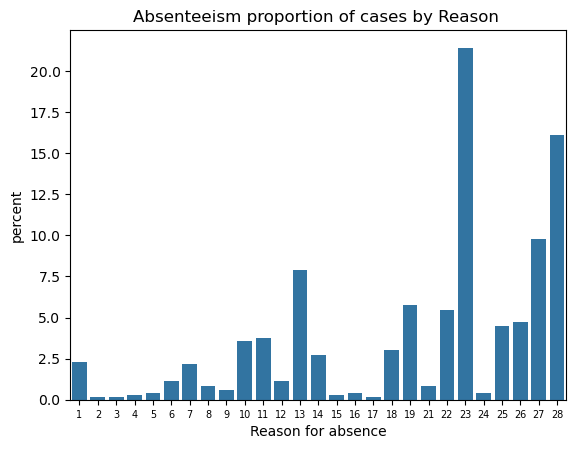

In [19]:
mpl.rcParams['xtick.labelsize'] = 7  
sns.countplot(data=df_absent, x='Reason for absence', stat='percent' )
plt.title("Absenteeism proportion of cases by Reason ")
plt.show()

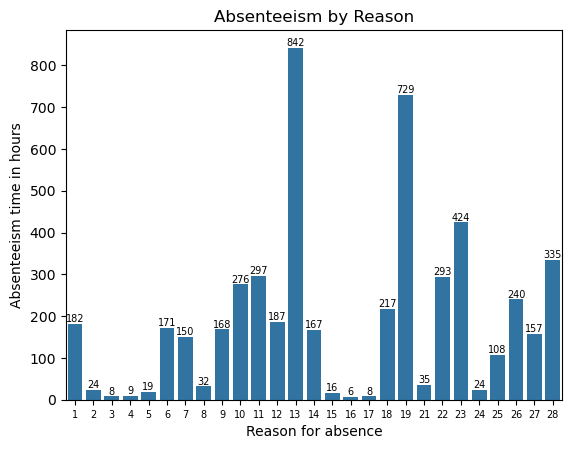

In [20]:
mpl.rcParams['xtick.labelsize'] = 7  
ax = sns.barplot(data=df_absent, x="Reason for absence", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=7)
plt.title("Absenteeism by Reason")
plt.show()

##### The main reasons for absences were medical consultation (21.4%), dental consultation (16.1%), physiotherapy(9.8%), diseases of the musculoskeletal system and connective tissue (7.9%), injuries (5.7%) and patient follow-up(5.5%)

##### The majority of absent hours were caused by diseases of the musculoskeletal system and connective tissue (842 hr); injury, poisoning and certain other consequences of external causes (729 hr); as well as medical(424 hr) and dental(335 hr) consultations. There were significant absences due to diseases of the respiratory(276 hr) and digestive(297 hr) systems. 


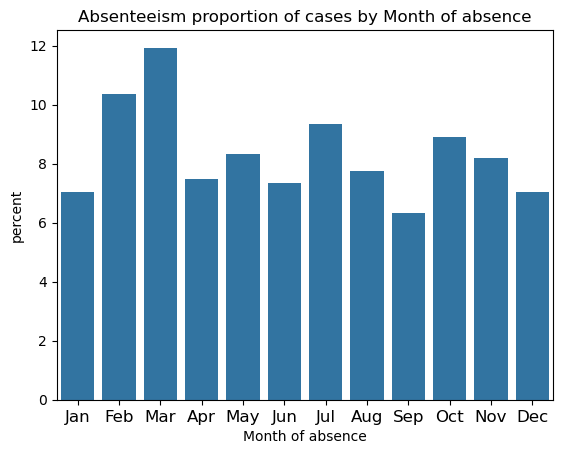

In [21]:
mpl.rcParams['xtick.labelsize'] = 12  
sns.countplot(data=df_absent, x='Month of absence', stat='percent' )
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Absenteeism proportion of cases by Month of absence")
plt.show()

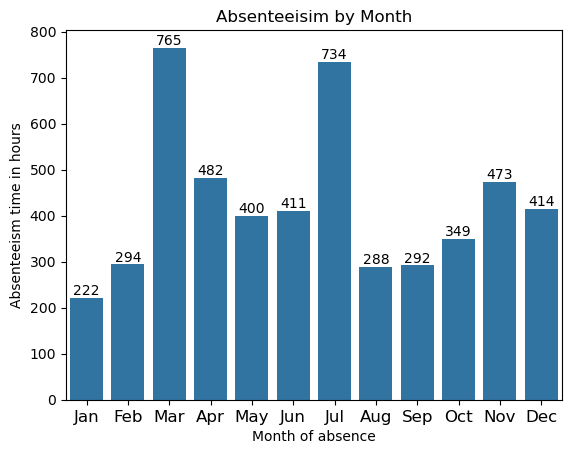

In [22]:
ax = sns.barplot(data=df_absent, x="Month of absence", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Absenteeisim by Month")
plt.show()

##### The months with the most absenteeism cases were March (12%), February (10.3%) and July (9.3%)
##### The months with the most absenteeism time were March (765 hr), July (734 hr), April (482 hr) and November (473 hr)

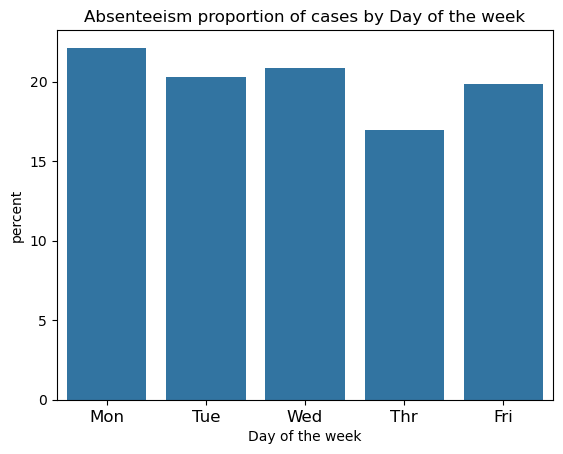

In [23]:
sns.countplot(data=df_absent, x='Day of the week', stat='percent' )
plt.xticks([0, 1, 2, 3, 4], ['Mon', 'Tue', 'Wed', 'Thr', 'Fri'])
plt.title("Absenteeism proportion of cases by Day of the week")
plt.show()

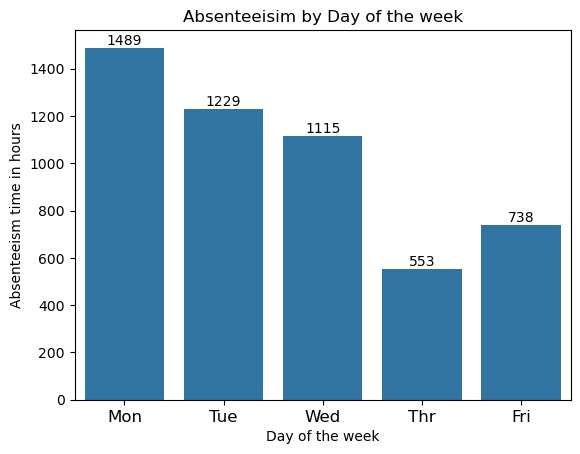

In [24]:
ax = sns.barplot(data=df_absent, x="Day of the week", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1, 2, 3, 4], ['Mon', 'Tue', 'Wed', 'Thr', 'Fri'])
plt.title("Absenteeisim by Day of the week")
plt.show()

##### The days with the most absence cases were Monday (22.1%), Wednesday (20.8%), Tuesday (20.3%) and Friday (19.8%) 
##### The days with the most absenteeism hours were Monday (1489 hr), Tuesday (1229 hr), Wednesday (1115 hr) and Friday (738 hr)



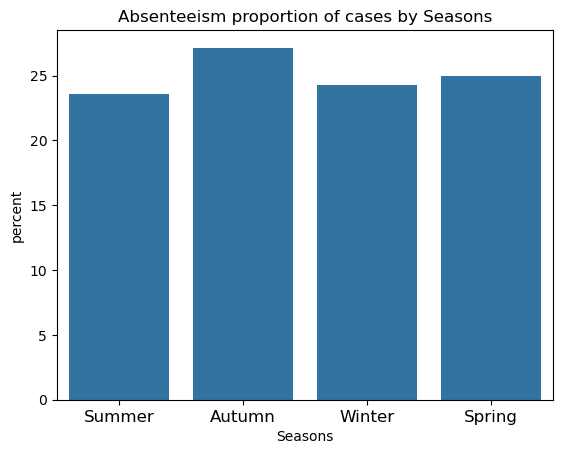

In [25]:
sns.countplot(data=df_absent, x='Seasons', stat='percent' )
plt.xticks([0, 1, 2, 3], ['Summer', 'Autumn', 'Winter', 'Spring'])
plt.title("Absenteeism proportion of cases by Seasons")
plt.show()

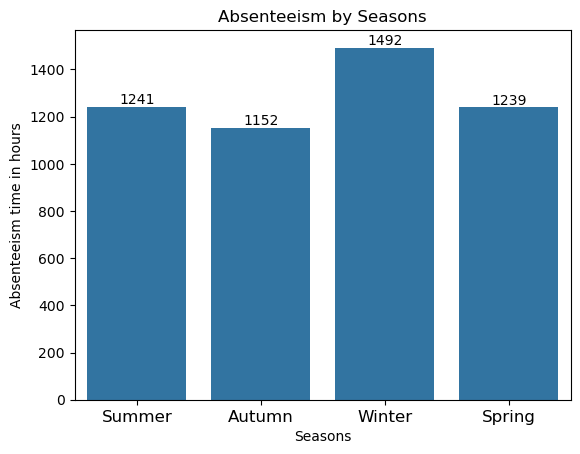

In [26]:
ax = sns.barplot(data=df_absent, x="Seasons", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1, 2, 3], ['Summer', 'Autumn', 'Winter', 'Spring'])
plt.title("Absenteeism by Seasons")
plt.show()

##### Absence cases were almost equally distributed across seasons with Autumn having a slight uptick (27.2%)

##### The season with the most absenteeism hours is Autumn (1492 hr), followed by Spring (1241) and Winter (1239) which differed very little.  

##### None of the absentees were subject to disciplinary action prior to being absent

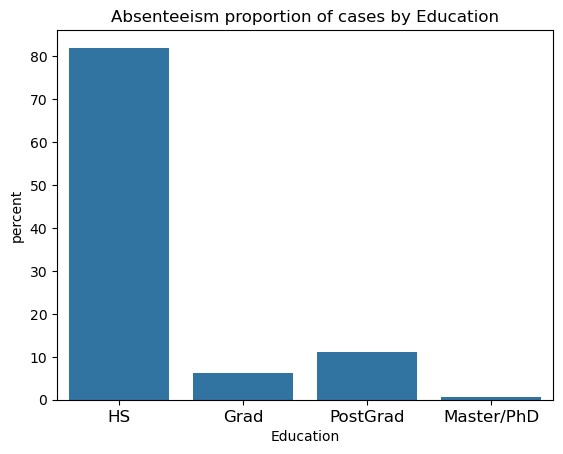

In [27]:
sns.countplot(data=df_absent, x='Education', stat='percent' )
plt.xticks([0, 1, 2, 3], ['HS', 'Grad', 'PostGrad', 'Master/PhD'])
plt.title("Absenteeism proportion of cases by Education")
plt.show()

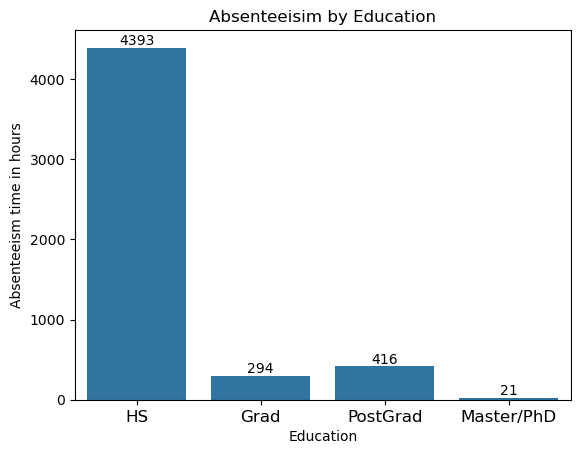

In [28]:
ax = sns.barplot(data=df_absent, x="Education", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1, 2, 3], ['HS', 'Grad', 'PostGrad', 'Master/PhD'])
plt.title("Absenteeisim by Education")
plt.show()

##### The majority of the absentees (82%) had high school education

##### Employees with this level of education had the most absenteeism hours (4393 hr)

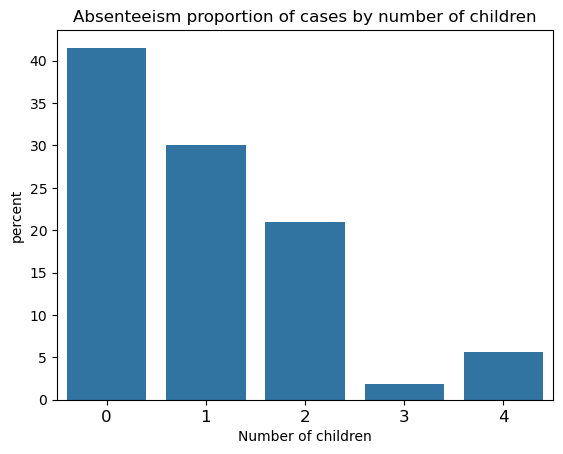

In [29]:
sns.countplot(data=df_absent, x='Son', stat='percent' )
plt.title("Absenteeism proportion of cases by number of children")
plt.xlabel('Number of children')
plt.show()

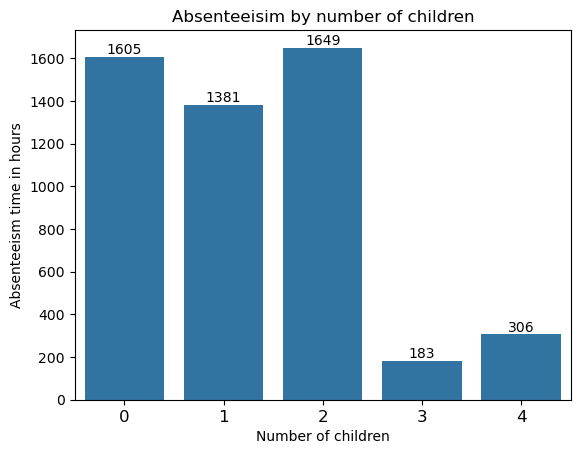

In [30]:
ax = sns.barplot(data=df_absent, x="Son", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Absenteeisim by number of children")
plt.xlabel('Number of children')
plt.show()

##### A large majority of absentees (58.5%) had children

##### The largest number of absenteeism hours were seen in employees with 2 children (1649 hr) 


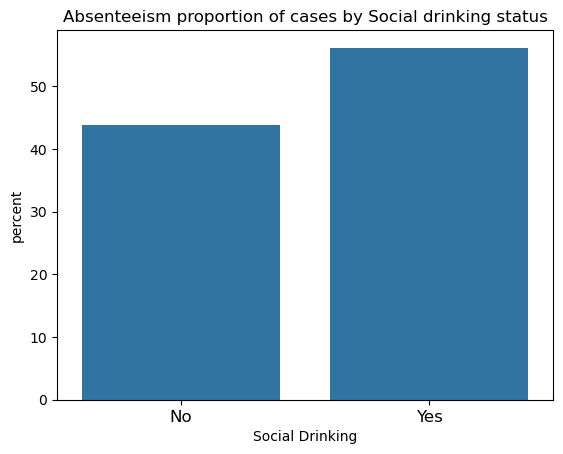

In [31]:
sns.countplot(data=df_absent, x='Social drinker', stat='percent' )
plt.title("Absenteeism proportion of cases by Social drinking status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Social Drinking')
plt.show()

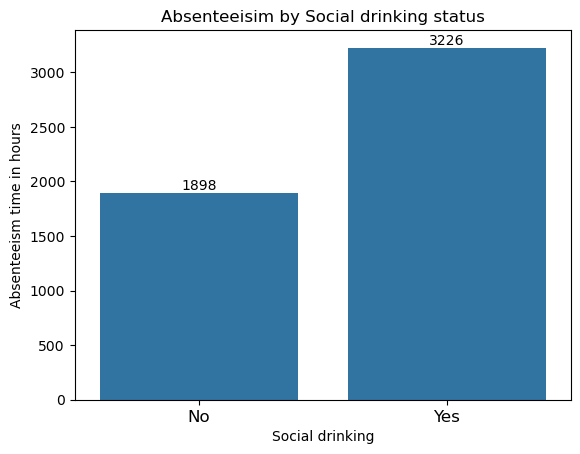

In [32]:
ax = sns.barplot(data=df_absent, x="Social drinker", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Absenteeisim by Social drinking status")
plt.xlabel('Social drinking')
plt.show()

##### 56.2 percent of absentees were social drinkers. The largest number of absenteeism hours were in the social drinker group (3226 hr)

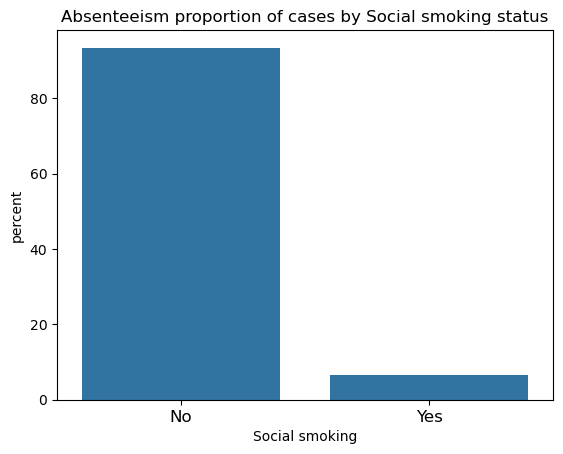

In [33]:
sns.countplot(data=df_absent, x='Social smoker', stat='percent' )
plt.title("Absenteeism proportion of cases by Social smoking status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Social smoking')
plt.show()

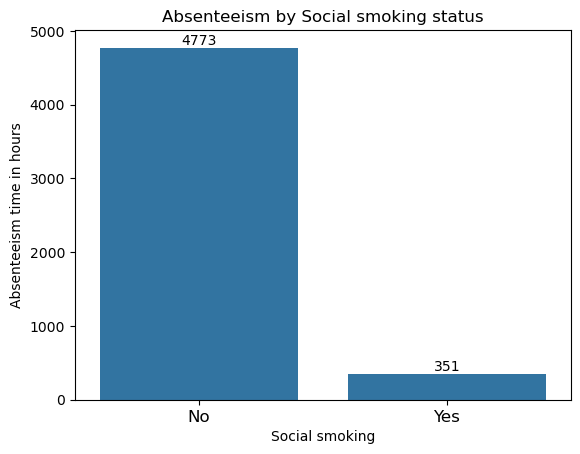

In [34]:
ax = sns.barplot(data=df_absent, x="Social smoker", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Absenteeism by Social smoking status")
plt.xlabel('Social smoking')
plt.show()

##### 6.6 percent of absentees were social smokers. The largest number of absenteeism hours were in the non-smoker group (4773 hr)

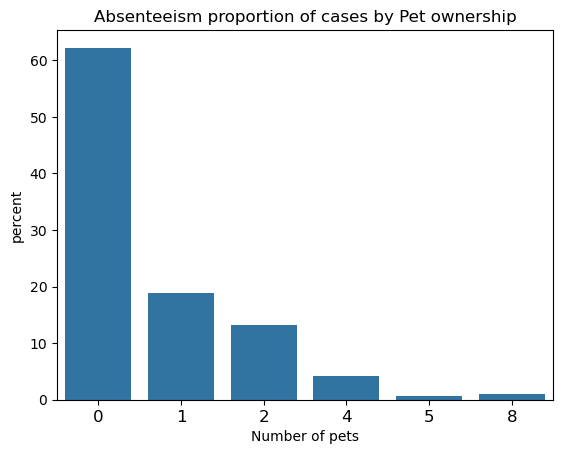

In [35]:
sns.countplot(data=df_absent, x='Pet', stat='percent' )
plt.title("Absenteeism proportion of cases by Pet ownership")
plt.xlabel('Number of pets')
plt.show()

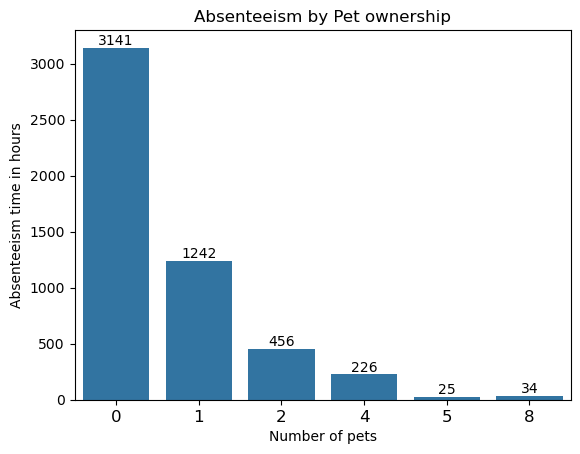

In [36]:
ax = sns.barplot(data=df_absent, x="Pet", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Absenteeism by Pet ownership")
plt.xlabel('Number of pets')
plt.show()

##### 37.8% of absenteeism cases were found in employees who owned pets. The total number of absenteeism hours for pet owners was 1983 hr. The largest number of hours belonged to the no-pet ownership group (3141 hr)

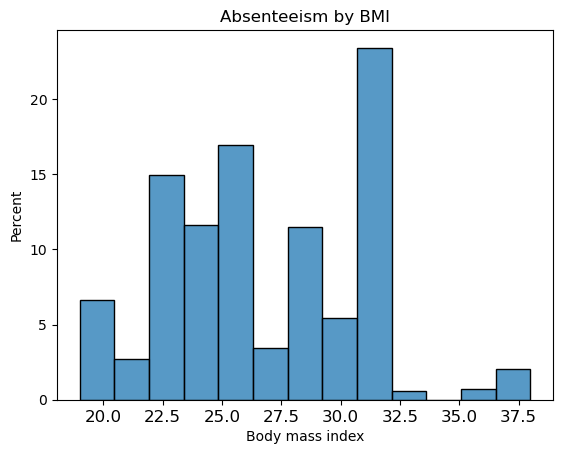

In [106]:
sns.histplot(data=df_absent, x="Body mass index", stat="percent")
plt.title("Absenteeism by BMI")
plt.show()

In [38]:
# Proportion of absentees with obesity condition
(df_absent["Body mass index"] >= 30).sum()/len(df_absent)*100

32.18390804597701

In [39]:
# Proportion of absentees with overweight condition
((df_absent["Body mass index"] >= 25) & (df_absent["Body mass index"] < 30)).sum()/len(df_absent)*100

31.896551724137932

##### 31.9% of absentees were overweight and 32.2% were obese

In [40]:
df_absent['obese'] = df_absent["Body mass index"] >= 30

In [41]:
df_absent['overweight'] = (df_absent["Body mass index"] >= 25) & (df_absent["Body mass index"] < 30)

In [42]:
df_absent

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,obese,overweight
0,11,26,7,3,1,289,36,13,33,239.554,...,2,1,0,1,90,172,30,4,True,False
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,0,89,170,31,2,True,False
3,7,7,7,5,1,279,5,14,39,239.554,...,2,1,1,0,68,168,24,4,False,False
4,11,23,7,5,1,289,36,13,33,239.554,...,2,1,0,1,90,172,30,2,True,False
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,0,89,170,31,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,10,22,7,4,1,361,52,3,28,264.604,...,1,1,0,4,80,172,27,8,False,True
733,28,22,7,4,1,225,26,9,28,264.604,...,1,0,0,2,69,169,24,8,False,False
734,13,13,7,2,1,369,17,12,31,264.604,...,3,1,0,0,70,169,25,80,False,True
735,11,14,7,3,1,289,36,13,33,264.604,...,2,1,0,1,90,172,30,8,True,False


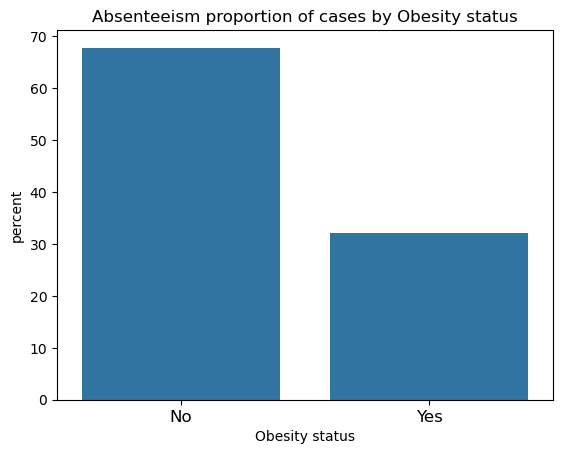

In [43]:
sns.countplot(data=df_absent, x='obese', stat='percent' )
plt.title("Absenteeism proportion of cases by Obesity status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Obesity status')
plt.show()

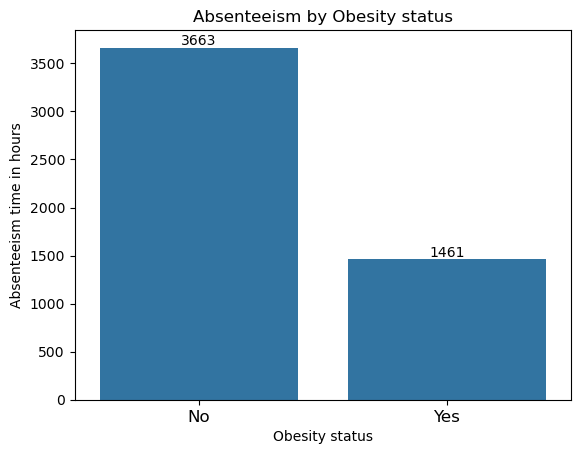

In [44]:
ax = sns.barplot(data=df_absent, x="obese", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Absenteeism by Obesity status")
plt.xlabel('Obesity status')
plt.show()

##### 32.2% of absenteeism cases were found in employees with obesity. The total number of absenteeism hours for these employees was 1461 hr.

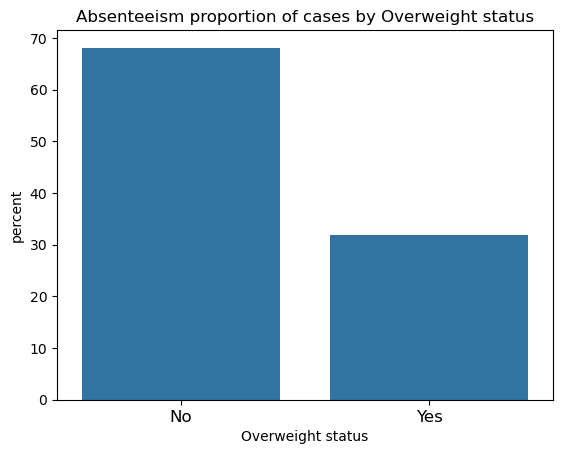

In [45]:
sns.countplot(data=df_absent, x='overweight', stat='percent' )
plt.title("Absenteeism proportion of cases by Overweight status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Overweight status')
plt.show()

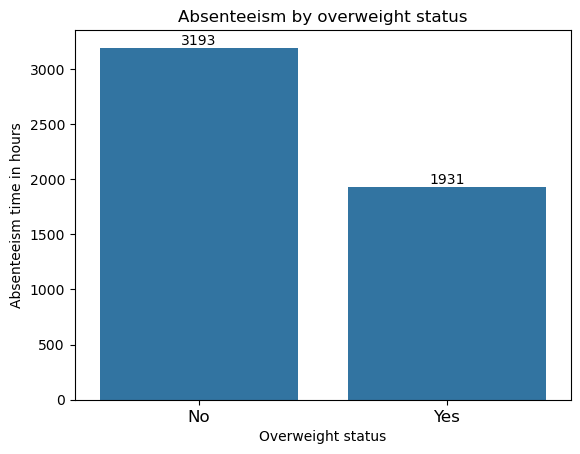

In [46]:
ax = sns.barplot(data=df_absent, x="overweight", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Absenteeism by overweight status")
plt.xlabel('Overweight status')
plt.show()

##### 31.9% of absenteeism cases were found in employees who were overweight. The total number of absenteeism hours for these employees was 1931 hr.

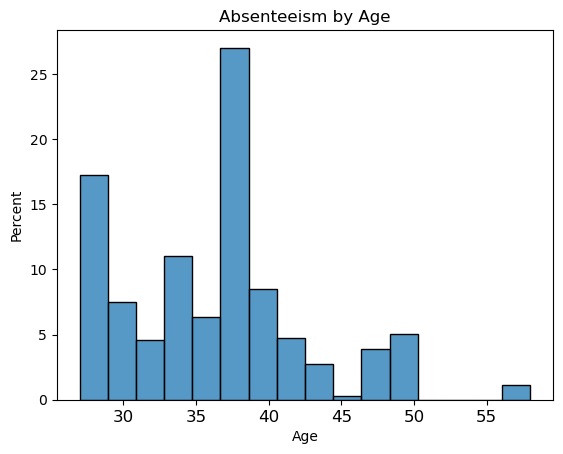

In [113]:
sns.histplot(data=df_absent, x="Age", stat="percent")
plt.title("Absenteeism by Age")
plt.show()

##### 40.4% of absenteeism cases were found in employees who were younger than 35 years old. 38.8% of cases were found in the 35 to 40 years old bracket

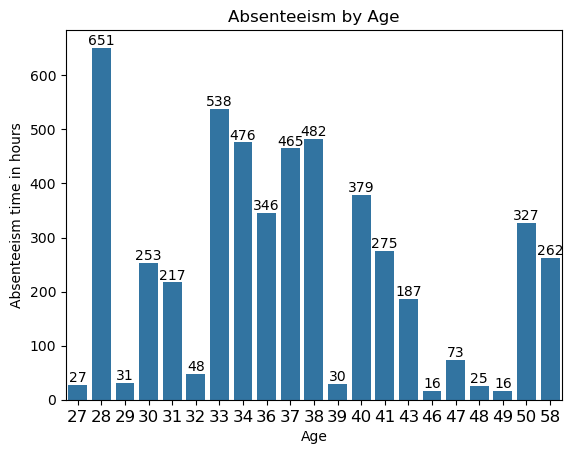

In [127]:
ax = sns.barplot(data=df_absent, x="Age", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Absenteeism by Age")
plt.xlabel('Age')
plt.show()

##### The largest number of absent hours (1777 hr) were found in the 33-40 year old bracket

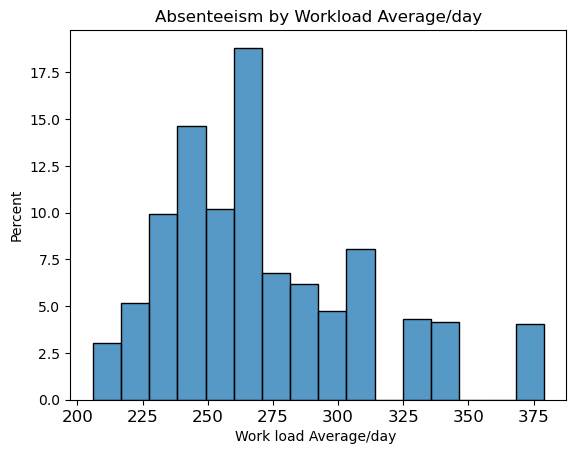

In [120]:
sns.histplot(data=df_absent, x='Work load Average/day ', stat="percent")
plt.title("Absenteeism by Workload Average/day")
plt.show()

##### 43.7% of absenteeism cases were found in employees with a 240 to 250 Workload average a day

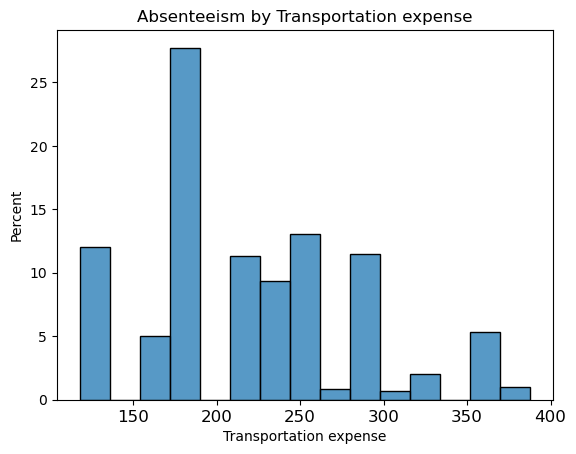

In [123]:
sns.histplot(data=df_absent, x='Transportation expense', stat="percent")
plt.title("Absenteeism by Transportation expense")
plt.show()

##### 61.5% of absentees had a transportation expense between 175 and 280

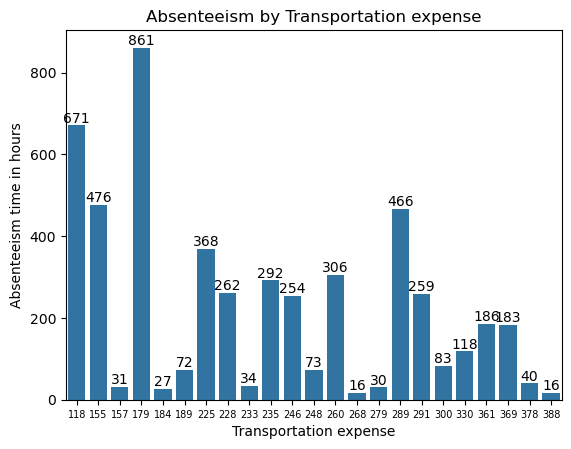

In [133]:
mpl.rcParams['xtick.labelsize'] = 7  
ax = sns.barplot(data=df_absent, x="Transportation expense", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Absenteeism by Transportation expense")
plt.xlabel('Transportation expense')
plt.show()

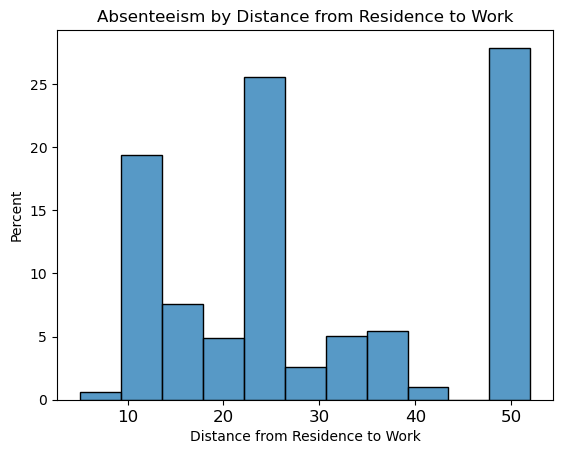

In [125]:
sns.histplot(data=df_absent, x='Distance from Residence to Work', stat="percent")
plt.title("Absenteeism by Distance from Residence to Work")
plt.show()

##### 67.7% of absentees live 25 Km or farther from work. The largest group of absentees (27.9%) live 50+ Km from work

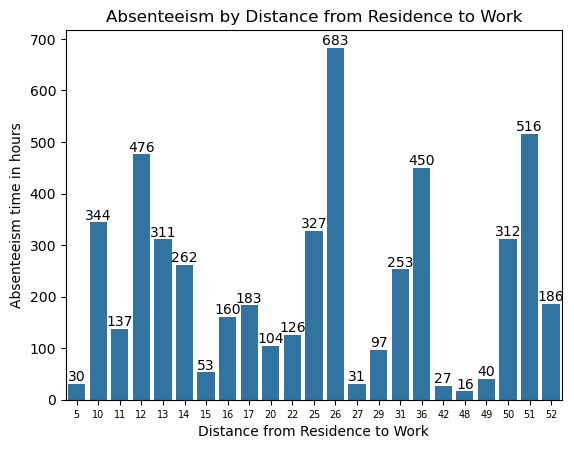

In [134]:
ax = sns.barplot(data=df_absent, x="Distance from Residence to Work", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Absenteeism by Distance from Residence to Work")
plt.xlabel('Distance from Residence to Work')
plt.show()

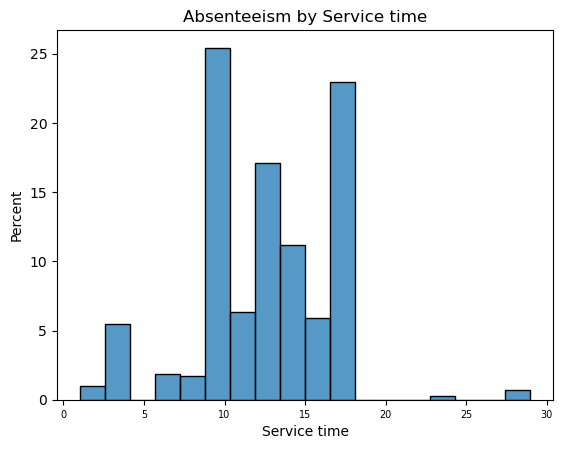

In [138]:
sns.histplot(data=df_absent, x='Service time', stat="percent")
plt.title("Absenteeism by Service time")
plt.show()

##### 88.9% of absences were in employees with 9 to 18 years of service

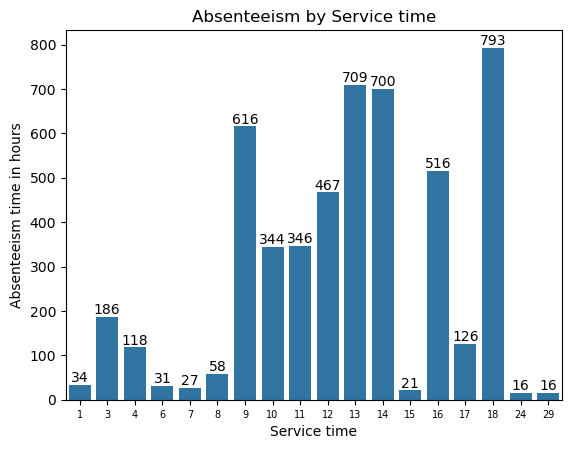

In [139]:
ax = sns.barplot(data=df_absent, x="Service time", y="Absenteeism time in hours", estimator=sum, errorbar = None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Absenteeism by Service time")
plt.xlabel('Service time')
plt.show()

##### The largest number of absence hours (3182 hr) were found in the group with 9-14 years of service 

In [ ]:
ax_1 = sns.histplot(data=df_absent, x='Service time', stat="percent")
ax_1.bar_label((ax_1.containers[0]))
plt.title("Absenteeism by Service time")
plt.show()

## Modeling

Develop models to predict absenteeism

In [47]:
# Import libraries to perform feature analysis and model development
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve


### 1) Extract and evaluate statistical properties of variables to be used for modeling

In [48]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [49]:
# Feature understanding - Identified numerical features for modeling
numeric_cols = ['Transportation expense', 'Distance from Residence to Work',
                'Service time','Age','Work load Average/day ', 'Body mass index']

# Feature understanding - Identified categorical features for modeling
categorical_cols = ['Education', 'Son', 'Pet', 'Social drinker', 'Social smoker']

In [50]:
# Select colums to drop that are not relevant for our modeling work
columns_to_drop = ['ID','Reason for absence','Month of absence', 'Day of the week',
'Seasons','Hit target', 'Disciplinary failure', 'Weight', 'Height', 'Absenteeism time in hours']


In [51]:
#  Create feature data frame. Select model features for modeling before performing scaling/encoding of variables
X = df.drop(columns_to_drop, axis=1)

In [52]:
# Check contents of feature data frame
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Transportation expense           740 non-null    int64  
 1   Distance from Residence to Work  740 non-null    int64  
 2   Service time                     740 non-null    int64  
 3   Age                              740 non-null    int64  
 4   Work load Average/day            740 non-null    float64
 5   Education                        740 non-null    int64  
 6   Son                              740 non-null    int64  
 7   Social drinker                   740 non-null    int64  
 8   Social smoker                    740 non-null    int64  
 9   Pet                              740 non-null    int64  
 10  Body mass index                  740 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 63.7 KB


In [53]:
# Compute summary statistics for numerical features used for modeling
X[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884
Body mass index,740.0,26.677027,4.285452,19.000,24.000,25.000,31.000,38.000


In [54]:
#Standardize numerical features prior to building models
standard_scaler = StandardScaler()
X[numeric_cols] = standard_scaler.fit_transform(X[numeric_cols])
X[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Transportation expense,740.0,-9.121832e-17,1.000676,-1.544379,-0.632665,0.054856,0.577971,2.491075
Distance from Residence to Work,740.0,-3.000603e-17,1.000676,-1.661258,-0.919357,-0.244901,1.373794,1.508686
Service time,740.0,-8.161640e-17,1.000676,-2.636762,-0.811074,0.101770,0.786403,3.753146
Age,740.0,-4.272858e-16,1.000676,-1.459596,-0.841778,0.084950,0.548314,3.328497
Work load Average/day,740.0,-3.840772e-16,1.000676,-1.679999,-0.694390,-0.185522,0.582264,2.751449
Body mass index,740.0,1.128227e-16,1.000676,-1.792627,-0.625100,-0.391595,1.009438,2.643976


As expected numeric feature standardization removes the mean (mean ~= 0) and scales to unit variance


In [55]:
# Display model features data frame
X.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Education,Son,Social drinker,Social smoker,Pet,Body mass index
0,1.011408,0.429556,0.101770,-0.532868,-0.818212,1,2,1,0,1,0.775932
1,-1.544379,-1.121694,1.242825,2.092860,-0.818212,1,1,1,0,0,1.009438
2,-0.632665,1.441240,1.242825,0.239405,-0.818212,1,0,1,0,0,1.009438
3,0.861947,-1.661258,0.329981,0.393859,-0.818212,1,2,1,1,0,-0.625100
4,1.011408,0.429556,0.101770,-0.532868,-0.818212,1,2,1,0,1,0.775932


In [56]:
#Encode categorical features
X = pd.get_dummies(data = X, columns = categorical_cols)

In [57]:
X.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Body mass index,Education_1,Education_2,Education_3,Education_4,...,Pet_0,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8,Social drinker_0,Social drinker_1,Social smoker_0,Social smoker_1
0,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.775932,True,False,False,False,...,False,True,False,False,False,False,False,True,True,False
1,-1.544379,-1.121694,1.242825,2.092860,-0.818212,1.009438,True,False,False,False,...,True,False,False,False,False,False,False,True,True,False
2,-0.632665,1.441240,1.242825,0.239405,-0.818212,1.009438,True,False,False,False,...,True,False,False,False,False,False,False,True,True,False
3,0.861947,-1.661258,0.329981,0.393859,-0.818212,-0.625100,True,False,False,False,...,True,False,False,False,False,False,False,True,False,True
4,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.775932,True,False,False,False,...,False,True,False,False,False,False,False,True,True,False


In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Transportation expense           740 non-null    float64
 1   Distance from Residence to Work  740 non-null    float64
 2   Service time                     740 non-null    float64
 3   Age                              740 non-null    float64
 4   Work load Average/day            740 non-null    float64
 5   Body mass index                  740 non-null    float64
 6   Education_1                      740 non-null    bool   
 7   Education_2                      740 non-null    bool   
 8   Education_3                      740 non-null    bool   
 9   Education_4                      740 non-null    bool   
 10  Son_0                            740 non-null    bool   
 11  Son_1                            740 non-null    bool   
 12  Son_2                 

In [59]:
# Extract target feature for binary classification modeling
# Consider 4 hr or more as counting as an absence from work
y = df['Absenteeism time in hours'] > 4

In [60]:
y.describe

<bound method NDFrame.describe of 0      False
1      False
2      False
3      False
4      False
       ...  
735     True
736    False
737    False
738    False
739    False
Name: Absenteeism time in hours, Length: 740, dtype: bool>

In [61]:
# Check if there is target class imbalance
num_yes = y.sum()
num_no = len(y) - num_yes
percentage_yes = num_yes/len(y)*100
percentage_no = num_no/len(y)*100
print('Number of Yes =', num_yes)
print('Number of No =', num_no)
print('Percentage of Yes =', percentage_yes)
print('Percentage of No =', percentage_no)



Number of Yes = 279
Number of No = 461
Percentage of Yes = 37.7027027027027
Percentage of No = 62.29729729729729


There is significant class imbalance in the data set with 62.3% on target entries being 0 ('no') and 37.7% being 1 ('yes')

### 2) Mitigate impact of class imbalance by using SMOTE




In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [63]:
# Check target class imbalance after SMOTE
num_yes = y_resampled.sum()
num_no = len(y_resampled) - num_yes
percentage_yes = num_yes/len(y_resampled)*100
percentage_no = num_no/len(y_resampled)*100
print('Number of Yes =', num_yes)
print('Number of No =', num_no)
print('Percentage of Yes =', percentage_yes)
print('Percentage of No =', percentage_no)

Number of Yes = 461
Number of No = 461
Percentage of Yes = 50.0
Percentage of No = 50.0


The class imbalance in the data set was eliminated by SMOTE. Now 50.0% of target entries are 0 ('no') and 50.0% are 1 ('yes')

### 3) Train/Test Split

Splitting the data into a train and test set.

In [64]:
# Generate a 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


### 4) Develop baseline reference model

Establish baseline performance using dummy classifier

In [65]:
# Establish baseline using sklearn dummy classifier
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)

print(baseline_score)

0.4594594594594595


The baseline performance that our classifier should aim to beat is an accuracy of 46.0%


### 5) Basic modeling with default estimator values

In this section we will build basic models of absenteeism using default modeling values 

#### Basic logistic regression model with default estimation values


In [66]:
lr_default_model = LogisticRegression()
start_time = time.time()
lr_default_model.fit(X_train, y_train)
end_time = time.time()
lr_default_model_train_time = end_time - start_time

lr_default_model_train_acc = lr_default_model.score(X_train, y_train)
lr_default_model_test_acc = lr_default_model.score(X_test, y_test)

print(f'Default LR model Training Accuracy: {lr_default_model_train_acc: .3f}')
print(f'Default LR model Test Accuracy: {lr_default_model_test_acc: .3f}')
print(f'Default LR model Train Time: {lr_default_model_train_time: .3f}')

Default LR model Training Accuracy:  0.659
Default LR model Test Accuracy:  0.605
Default LR model Train Time:  0.011


#### Performance comparison between basic classification models

Now, we aim to compare the performance of the basic Logistic Regression model to basic KNN algorithm, Decision Tree, and SVM models.  Will use default settings for each of the models to fit and score each. 

In [67]:
knn_default_model = KNeighborsClassifier()

start_time = time.time()
knn_default_model.fit(X_train, y_train)
end_time = time.time()
knn_default_model_train_time = end_time - start_time

knn_default_model_train_acc = knn_default_model.score(X_train, y_train)
knn_default_model_test_acc = knn_default_model.score(X_test, y_test)

print(f'Default KNN model Training Accuracy: {knn_default_model_train_acc: .3f}')
print(f'Default KNN model Test Accuracy: {knn_default_model_test_acc: .3f}')
print(f'Default KNN model Train Time: {knn_default_model_train_time: .3f}')

Default KNN model Training Accuracy:  0.784
Default KNN model Test Accuracy:  0.686
Default KNN model Train Time:  0.002


In [68]:
dtree_default_model = DecisionTreeClassifier()

start_time = time.time()
dtree_default_model.fit(X_train, y_train)
end_time = time.time()
dtree_default_model_train_time = end_time - start_time

dtree_default_model_train_acc = dtree_default_model.score(X_train, y_train)
dtree_default_model_test_acc = dtree_default_model.score(X_test, y_test)

print(f'Default DTree model Training Accuracy: {dtree_default_model_train_acc: .3f}')
print(f'Default DTree model Test Accuracy: {dtree_default_model_test_acc: .3f}')
print(f'Default DTree model Train Time: {dtree_default_model_train_time: .3f}')

Default DTree model Training Accuracy:  0.920
Default DTree model Test Accuracy:  0.719
Default DTree model Train Time:  0.005


In [69]:
svm_default_model = SVC()

start_time = time.time()
svm_default_model.fit(X_train, y_train)
end_time = time.time()
svm_default_model_train_time = end_time - start_time

svm_default_model_train_acc = svm_default_model.score(X_train, y_train)
svm_default_model_test_acc = svm_default_model.score(X_test, y_test)

print(f'Default SVM model Training Accuracy: {svm_default_model_train_acc: .3f}')
print(f'Default SVM model Test Accuracy: {svm_default_model_test_acc: .3f}')
print(f'Default SVM model Train Time: {svm_default_model_train_time: .3f}')


Default SVM model Training Accuracy:  0.712
Default SVM model Test Accuracy:  0.654
Default SVM model Train Time:  0.020


In [70]:
# Create summary pandas data frame

In [71]:
d = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
     'Train Time': [lr_default_model_train_time, knn_default_model_train_time, dtree_default_model_train_time, svm_default_model_train_time],
     'Train Accuracy': [lr_default_model_train_acc, knn_default_model_train_acc, dtree_default_model_train_acc, svm_default_model_train_acc],
     'Test Accuracy': [lr_default_model_test_acc, knn_default_model_test_acc, dtree_default_model_test_acc, svm_default_model_test_acc]}
results_df = pd.DataFrame(data=d)
results_df.set_index('Model', inplace = True)

In [72]:
# Display summary data frame
results_df

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistic Regression,0.010970,0.659430,0.605405
KNN,0.001995,0.784261,0.686486
Decision Tree,0.004987,0.919946,0.718919
SVM,0.019948,0.712347,0.654054


The Decision Tree basic model with default parameters had the best test accuracy, followed by the decision KNN model. The SVM model took the longest to compute on my system.

### 6) Improving the Model

Options to explore
- Hyperparameter tuning and grid search 
- Adjusting performance metric
- More feature engineering and exploration


#### Hyperparameter tuning and performance metric adjustments

The section below uses GridSearchCV, RandomizedSearchCV and BayesSearchCV to perform hyperparameter searches and tuning for different classification models to optimize their performance metrics in terms of accuracy, precision and F1-scores. 

##### GridSearch method

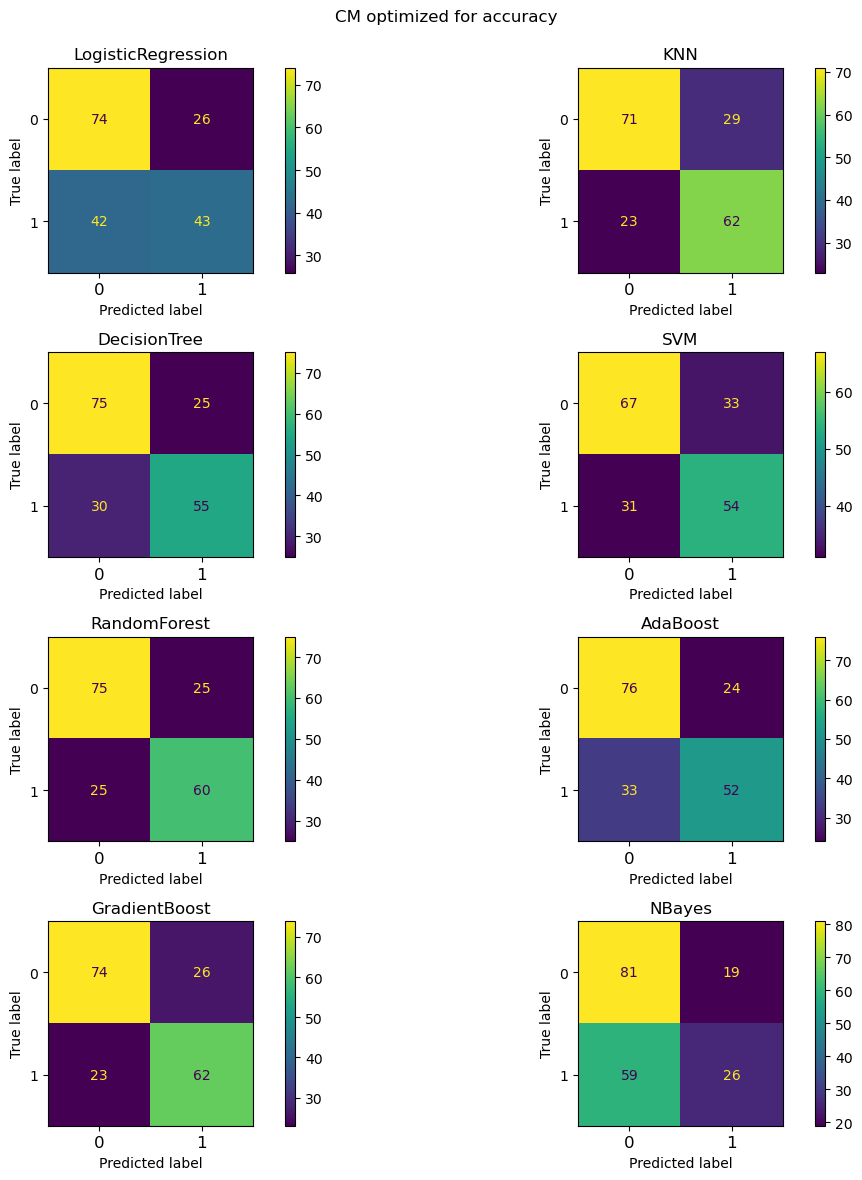

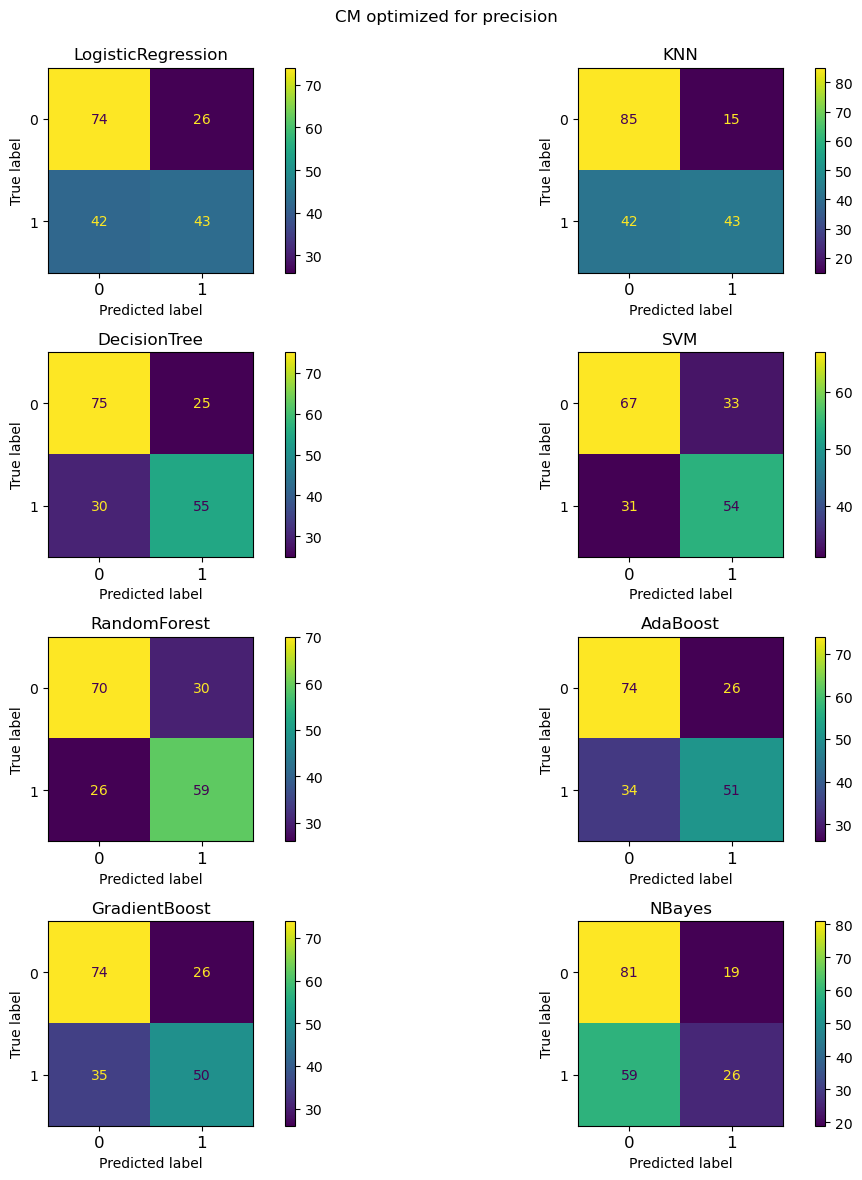

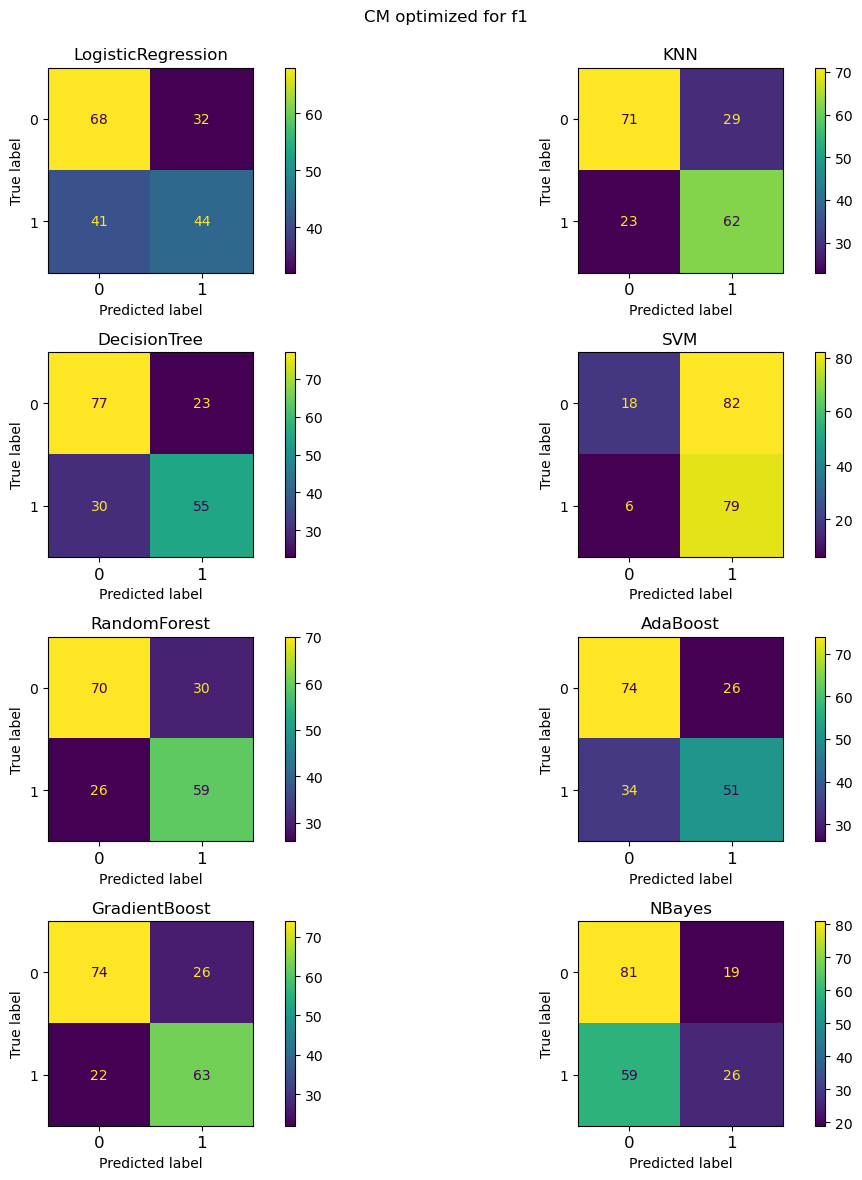

In [73]:
### Import modeling and visualization Libraries
import numpy as np
import pandas as pd
pd.set_option('display.width', None)        
pd.set_option('display.max_colwidth', 120)  #Set maximum column width
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore") 


### Define classification models and parameter grids for searches
# Define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter = 10000),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoost': GradientBoostingClassifier(),
    'NBayes': GaussianNB()
}

# Define parameter grids
param_grids = {
    'LogisticRegression': {'C': np.logspace(-2, 5, 30), 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] },
    'KNN': {'n_neighbors': [2, 5, 7, 10, 20], 'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
    'DecisionTree': {'max_depth': [2, 5, 10, 15, 20, 30, 50], 'criterion':['gini', 'entropy', 'log_loss'], 'min_samples_split': [2, 3, 5]},
    'SVM': {'C': [0.01, 0.1, 1, 10, 10.05], 'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
    'RandomForest': {'n_estimators': [10, 50, 100, 200], 'max_depth': [None]},
    'AdaBoost': {'n_estimators': [10, 50, 100, 200]},
    'GradientBoost': {'n_estimators': [10, 50, 100, 200]},
    'NBayes': {'var_smoothing': [1e-9]}
}

### Train and validate classifiers using GridSearchCV
scoring_metrics = ['accuracy', 'precision', 'f1'] 
hyper_param_search_method = 'GridSearchCV'
grid_search_results_df_dict = {}


for scoring_metric in scoring_metrics:
    fig, axes = plt.subplots(4, 2, figsize=(12, 12))
    axes = axes.ravel()
    fig.suptitle('CM optimized for ' + scoring_metric + '\n', x = 0.6)
    results = []
    
    for idx, (name, classifier) in enumerate(classifiers.items()):
        match hyper_param_search_method:
            case "GridSearchCV":
                grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[name], scoring=scoring_metric, cv=5)
                
            case "BayesSearchCV":
                grid_search = BayesSearchCV(estimator=classifier, search_spaces=param_grids[name], n_iter=100, scoring=scoring_metric, cv=5)
                
            case "RandomizedSearchCV":
                grid_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_grids[name], scoring=scoring_metric, cv=5)
                
            case _:
                print("Unknown hyperparam search method")
        
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params =  grid_search.best_params_
        y_pred = best_model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[idx])
        axes[idx].set_title(name)
        results.append({
            'Classifier': name,
            'Test Accuracy': accuracy,
            'Test Recall': recall,
            'Test Precision': precision,
            'Test F1 Score': f1,
            'Best Params': best_params
            })
    
    
    plt.tight_layout()
    #plt.show()
    grid_search_results_df = pd.DataFrame(results)
    grid_search_results_df.set_index('Classifier', inplace = True)
    grid_search_results_df_dict[scoring_metric] = grid_search_results_df



In [74]:
# Display dictionary with results dataframes optimized for accuracy, precision and f1-score metrics
grid_search_results_df_dict

{'accuracy':                     Test Accuracy  Test Recall  Test Precision  Test F1 Score  \
 Classifier                                                                      
 LogisticRegression       0.632432     0.505882        0.623188       0.558442   
 KNN                      0.718919     0.729412        0.681319       0.704545   
 DecisionTree             0.702703     0.647059        0.687500       0.666667   
 SVM                      0.654054     0.635294        0.620690       0.627907   
 RandomForest             0.729730     0.705882        0.705882       0.705882   
 AdaBoost                 0.691892     0.611765        0.684211       0.645963   
 GradientBoost            0.735135     0.729412        0.704545       0.716763   
 NBayes                   0.578378     0.305882        0.577778       0.400000   
 
                                                                           Best Params  
 Classifier                                                                  

In [75]:
# Display results dataframe optimized for accuracy
grid_search_results_df_dict['accuracy'].drop(columns=['Best Params'])



,Test Accuracy,Test Recall,Test Precision,Test F1 Score
Classifier,,,,
LogisticRegression,0.632432,0.505882,0.623188,0.558442
KNN,0.718919,0.729412,0.681319,0.704545
DecisionTree,0.702703,0.647059,0.687500,0.666667
SVM,0.654054,0.635294,0.620690,0.627907
RandomForest,0.729730,0.705882,0.705882,0.705882
AdaBoost,0.691892,0.611765,0.684211,0.645963
GradientBoost,0.735135,0.729412,0.704545,0.716763
NBayes,0.578378,0.305882,0.577778,0.400000


In [76]:
# Display best parameters found by GridSearch to optimize classification accuracy
grid_search_results_df_dict['accuracy'][['Best Params']]

,Best Params
Classifier,
LogisticRegression,"{'C': 23.95026619987486, 'penalty': 'l2', 'solver': 'lbfgs'}"
KNN,"{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}"
DecisionTree,"{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3}"
SVM,"{'C': 10, 'kernel': 'poly'}"
RandomForest,"{'max_depth': None, 'n_estimators': 50}"
AdaBoost,{'n_estimators': 50}
GradientBoost,{'n_estimators': 200}
NBayes,{'var_smoothing': 1e-09}


In [77]:
# Display results dataframe optimized for precision
grid_search_results_df_dict['precision'].drop(columns=['Best Params'])



,Test Accuracy,Test Recall,Test Precision,Test F1 Score
Classifier,,,,
LogisticRegression,0.632432,0.505882,0.623188,0.558442
KNN,0.691892,0.505882,0.741379,0.601399
DecisionTree,0.702703,0.647059,0.687500,0.666667
SVM,0.654054,0.635294,0.620690,0.627907
RandomForest,0.697297,0.694118,0.662921,0.678161
AdaBoost,0.675676,0.600000,0.662338,0.629630
GradientBoost,0.670270,0.588235,0.657895,0.621118
NBayes,0.578378,0.305882,0.577778,0.400000


In [78]:
# Display best parameters found by GridSearch to optimize classification precision
grid_search_results_df_dict['precision'][['Best Params']]

,Best Params
Classifier,
LogisticRegression,"{'C': 41.753189365604044, 'penalty': 'l2', 'solver': 'newton-cg'}"
KNN,"{'n_neighbors': 2, 'p': 3, 'weights': 'uniform'}"
DecisionTree,"{'criterion': 'log_loss', 'max_depth': 30, 'min_samples_split': 3}"
SVM,"{'C': 10, 'kernel': 'poly'}"
RandomForest,"{'max_depth': None, 'n_estimators': 100}"
AdaBoost,{'n_estimators': 100}
GradientBoost,{'n_estimators': 50}
NBayes,{'var_smoothing': 1e-09}


In [143]:
# Display results dataframe optimized for f1-score
grid_search_results_df_dict['f1'].drop(columns=['Best Params'])



,Test Accuracy,Test Recall,Test Precision,Test F1 Score
Classifier,,,,
LogisticRegression,0.605405,0.517647,0.578947,0.546584
KNN,0.718919,0.729412,0.681319,0.704545
DecisionTree,0.713514,0.647059,0.705128,0.674847
SVM,0.524324,0.929412,0.490683,0.642276
RandomForest,0.697297,0.694118,0.662921,0.678161
AdaBoost,0.675676,0.600000,0.662338,0.629630
GradientBoost,0.740541,0.741176,0.707865,0.724138
NBayes,0.578378,0.305882,0.577778,0.400000


In [80]:
# Display best parameters found by GridSearch to optimize classification f1-score
grid_search_results_df_dict['f1'][['Best Params']]

,Best Params
Classifier,
LogisticRegression,"{'C': 0.16102620275609392, 'penalty': 'l2', 'solver': 'newton-cg'}"
KNN,"{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}"
DecisionTree,"{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 3}"
SVM,"{'C': 0.01, 'kernel': 'poly'}"
RandomForest,"{'max_depth': None, 'n_estimators': 100}"
AdaBoost,{'n_estimators': 100}
GradientBoost,{'n_estimators': 200}
NBayes,{'var_smoothing': 1e-09}


##### RandomizedSearch method

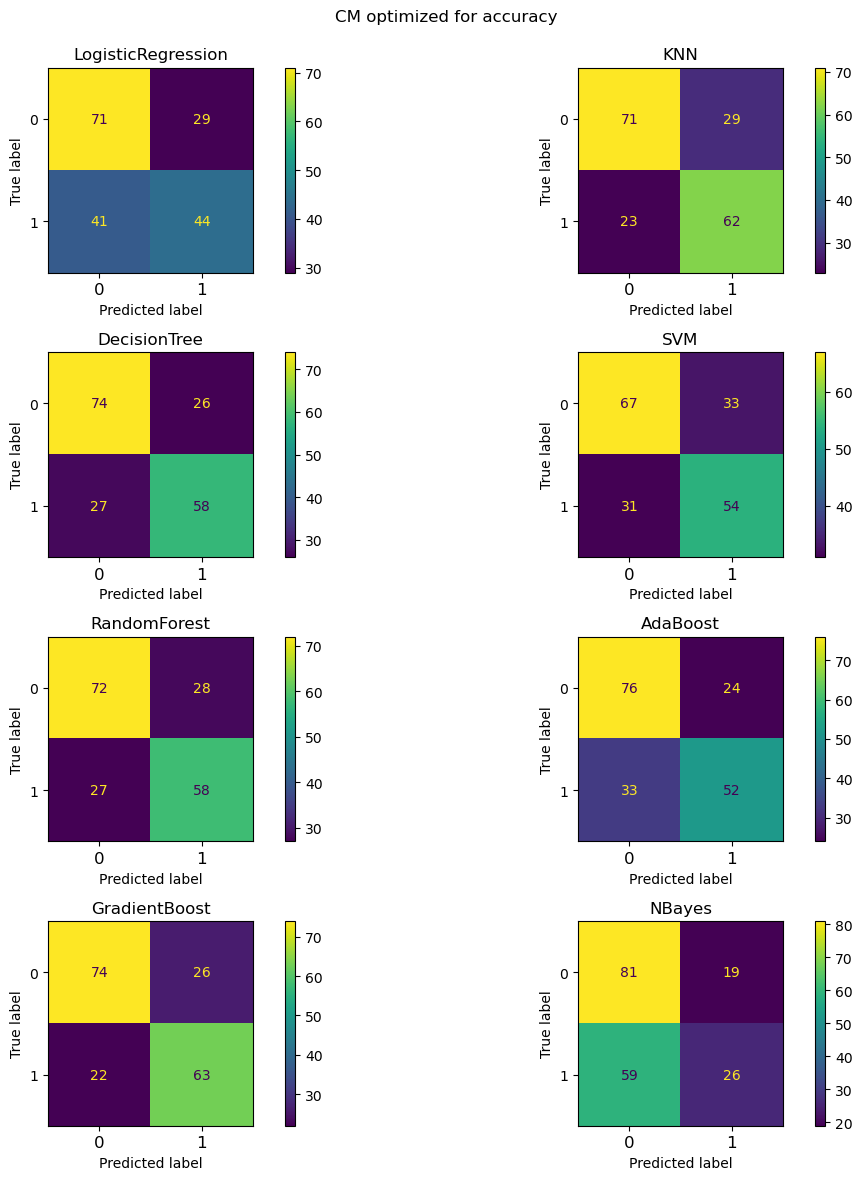

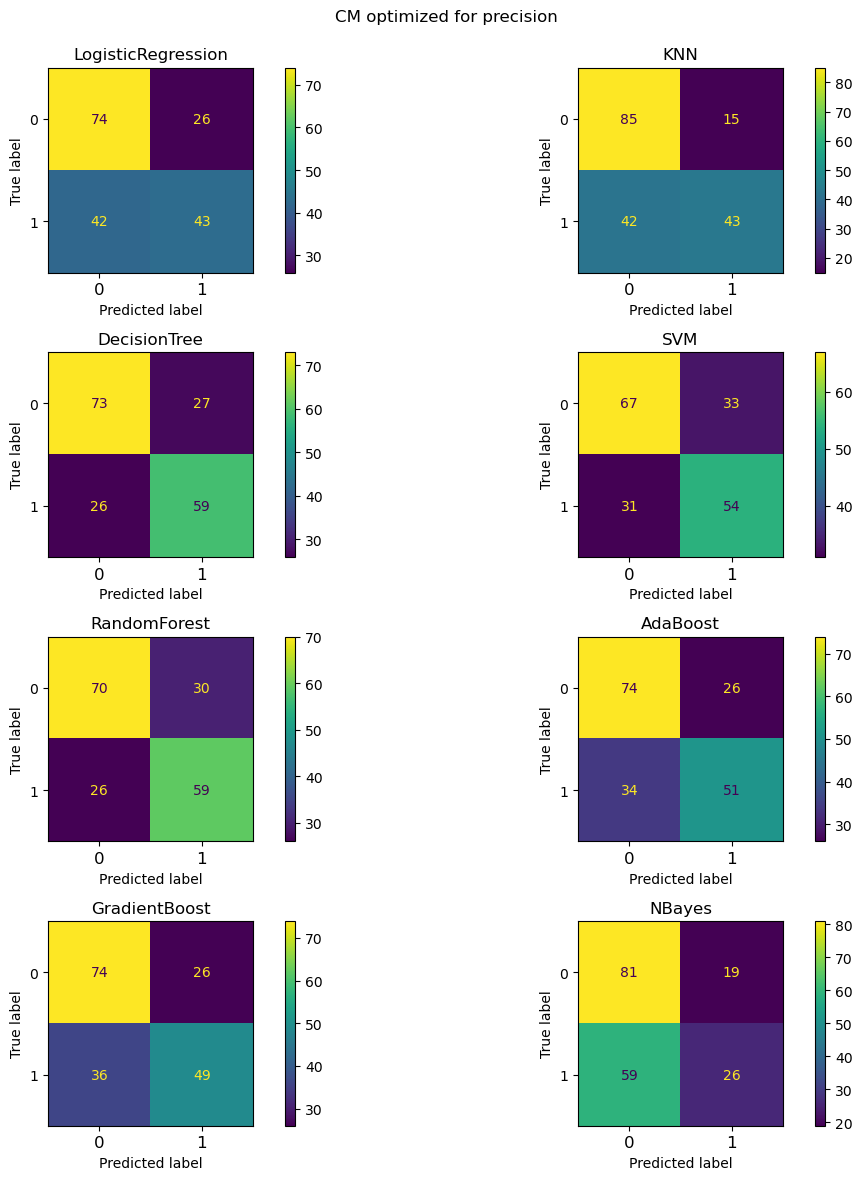

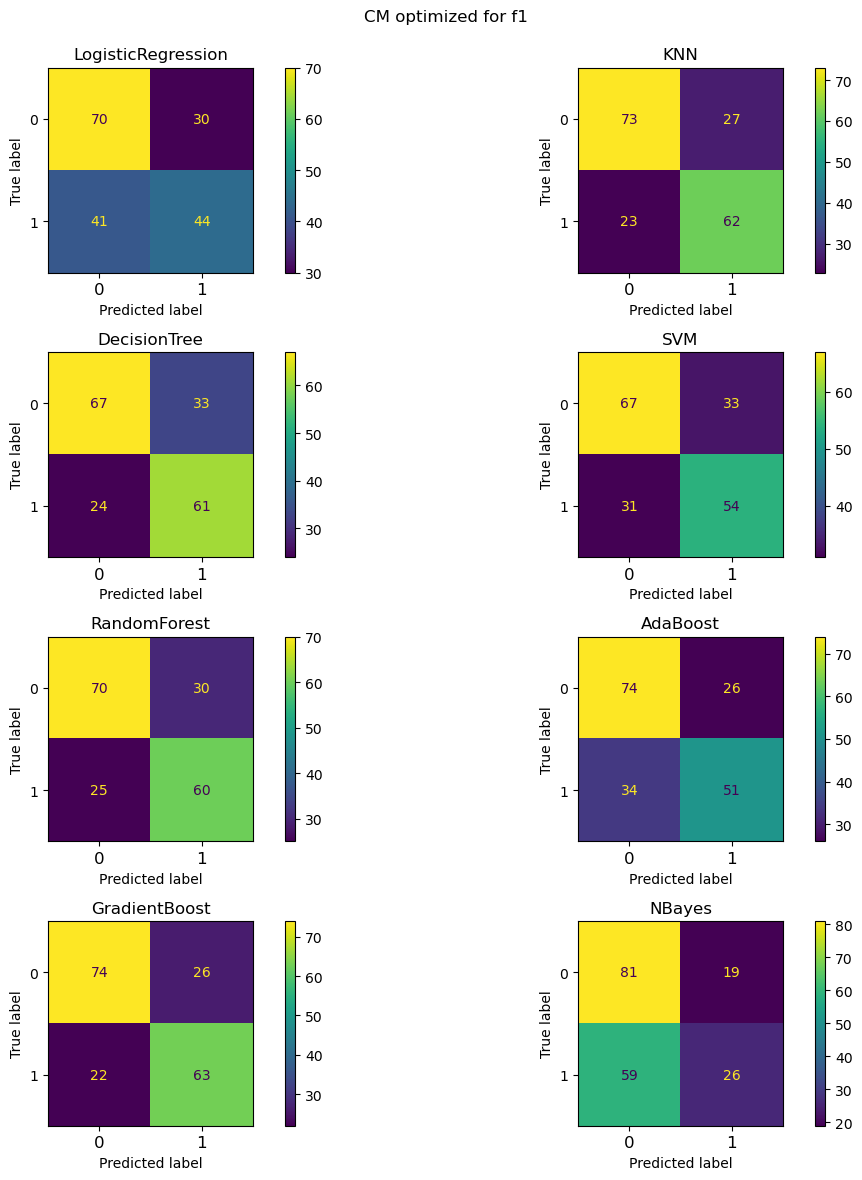

In [81]:
### Import modeling and visualization Libraries
import numpy as np
import pandas as pd
pd.set_option('display.width', None)        
pd.set_option('display.max_colwidth', 120)  #Set maximum column width
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore") 


### Define classification models and parameter grids for searches
# Define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter = 10000),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoost': GradientBoostingClassifier(),
    'NBayes': GaussianNB()
}

# Define parameter grids
param_grids = {
    'LogisticRegression': {'C': np.logspace(-2, 5, 30), 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] },
    'KNN': {'n_neighbors': [2, 5, 7, 10, 20], 'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
    'DecisionTree': {'max_depth': [2, 5, 10, 15, 20, 30, 50], 'criterion':['gini', 'entropy', 'log_loss'], 'min_samples_split': [2, 3, 5]},
    'SVM': {'C': [0.01, 0.1, 1, 10, 10.05], 'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
    'RandomForest': {'n_estimators': [10, 50, 100, 200], 'max_depth': [None]},
    'AdaBoost': {'n_estimators': [10, 50, 100, 200]},
    'GradientBoost': {'n_estimators': [10, 50, 100, 200]},
    'NBayes': {'var_smoothing': [1e-9]}
}

### Train and validate classifiers using RandomizedSearchCV
scoring_metrics = ['accuracy', 'precision', 'f1'] 
hyper_param_search_method = 'RandomizedSearchCV'
rand_search_results_df_dict = {}


for scoring_metric in scoring_metrics:
    fig, axes = plt.subplots(4, 2, figsize=(12, 12))
    axes = axes.ravel()
    fig.suptitle('CM optimized for ' + scoring_metric + '\n', x = 0.6)
    results = []
    
    for idx, (name, classifier) in enumerate(classifiers.items()):
        match hyper_param_search_method:
            case "GridSearchCV":
                grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[name], scoring=scoring_metric, cv=5)
                
            case "BayesSearchCV":
                grid_search = BayesSearchCV(estimator=classifier, search_spaces=param_grids[name], n_iter=100, scoring=scoring_metric, cv=5)
                
            case "RandomizedSearchCV":
                grid_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_grids[name], scoring=scoring_metric, cv=5)
                
            case _:
                print("Unknown hyperparam search method")
        
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params =  grid_search.best_params_
        y_pred = best_model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[idx])
        axes[idx].set_title(name)
        results.append({
            'Classifier': name,
            'Test Accuracy': accuracy,
            'Test Recall': recall,
            'Test Precision': precision,
            'Test F1 Score': f1,
            'Best Params': best_params
            })
    
    
    plt.tight_layout()
    #plt.show()
    rand_search_results_df = pd.DataFrame(results)
    rand_search_results_df.set_index('Classifier', inplace = True)
    rand_search_results_df_dict[scoring_metric] = rand_search_results_df


In [82]:
# Display dictionary with results dataframes optimized for accuracy, precision and f1-score metrics
rand_search_results_df_dict

{'accuracy':                     Test Accuracy  Test Recall  Test Precision  Test F1 Score  \
 Classifier                                                                      
 LogisticRegression       0.621622     0.517647        0.602740       0.556962   
 KNN                      0.718919     0.729412        0.681319       0.704545   
 DecisionTree             0.713514     0.682353        0.690476       0.686391   
 SVM                      0.654054     0.635294        0.620690       0.627907   
 RandomForest             0.702703     0.682353        0.674419       0.678363   
 AdaBoost                 0.691892     0.611765        0.684211       0.645963   
 GradientBoost            0.740541     0.741176        0.707865       0.724138   
 NBayes                   0.578378     0.305882        0.577778       0.400000   
 
                                                                           Best Params  
 Classifier                                                                  

In [83]:
# Display results dataframe optimized for accuracy
rand_search_results_df_dict['accuracy'].drop(columns=['Best Params'])



,Test Accuracy,Test Recall,Test Precision,Test F1 Score
Classifier,,,,
LogisticRegression,0.621622,0.517647,0.602740,0.556962
KNN,0.718919,0.729412,0.681319,0.704545
DecisionTree,0.713514,0.682353,0.690476,0.686391
SVM,0.654054,0.635294,0.620690,0.627907
RandomForest,0.702703,0.682353,0.674419,0.678363
AdaBoost,0.691892,0.611765,0.684211,0.645963
GradientBoost,0.740541,0.741176,0.707865,0.724138
NBayes,0.578378,0.305882,0.577778,0.400000


In [84]:
# Display best parameters found by RandomizedSearch to optimize classification accuracy
rand_search_results_df_dict['accuracy'][['Best Params']]

,Best Params
Classifier,
LogisticRegression,"{'solver': 'saga', 'penalty': 'l2', 'C': 0.4893900918477494}"
KNN,"{'weights': 'distance', 'p': 3, 'n_neighbors': 10}"
DecisionTree,"{'min_samples_split': 3, 'max_depth': 30, 'criterion': 'entropy'}"
SVM,"{'kernel': 'poly', 'C': 10.05}"
RandomForest,"{'n_estimators': 50, 'max_depth': None}"
AdaBoost,{'n_estimators': 50}
GradientBoost,{'n_estimators': 200}
NBayes,{'var_smoothing': 1e-09}


In [85]:
# Display results dataframe optimized for precision
rand_search_results_df_dict['precision'].drop(columns=['Best Params'])



,Test Accuracy,Test Recall,Test Precision,Test F1 Score
Classifier,,,,
LogisticRegression,0.632432,0.505882,0.623188,0.558442
KNN,0.691892,0.505882,0.741379,0.601399
DecisionTree,0.713514,0.694118,0.686047,0.690058
SVM,0.654054,0.635294,0.620690,0.627907
RandomForest,0.697297,0.694118,0.662921,0.678161
AdaBoost,0.675676,0.600000,0.662338,0.629630
GradientBoost,0.664865,0.576471,0.653333,0.612500
NBayes,0.578378,0.305882,0.577778,0.400000


In [86]:
# Display best parameters found by RandomizedSearch to optimize classification precision
rand_search_results_df_dict['precision'][['Best Params']]

,Best Params
Classifier,
LogisticRegression,"{'solver': 'newton-cholesky', 'penalty': 'l2', 'C': 23.95026619987486}"
KNN,"{'weights': 'uniform', 'p': 1, 'n_neighbors': 2}"
DecisionTree,"{'min_samples_split': 2, 'max_depth': 20, 'criterion': 'log_loss'}"
SVM,"{'kernel': 'poly', 'C': 10.05}"
RandomForest,"{'n_estimators': 50, 'max_depth': None}"
AdaBoost,{'n_estimators': 100}
GradientBoost,{'n_estimators': 50}
NBayes,{'var_smoothing': 1e-09}


In [87]:
# Display results dataframe optimized for f1-score
rand_search_results_df_dict['f1'].drop(columns=['Best Params'])



,Test Accuracy,Test Recall,Test Precision,Test F1 Score
Classifier,,,,
LogisticRegression,0.616216,0.517647,0.594595,0.553459
KNN,0.729730,0.729412,0.696629,0.712644
DecisionTree,0.691892,0.717647,0.648936,0.681564
SVM,0.654054,0.635294,0.620690,0.627907
RandomForest,0.702703,0.705882,0.666667,0.685714
AdaBoost,0.675676,0.600000,0.662338,0.629630
GradientBoost,0.740541,0.741176,0.707865,0.724138
NBayes,0.578378,0.305882,0.577778,0.400000


In [88]:
# Display best parameters found by RandomizedSearch to optimize classification f1-score
rand_search_results_df_dict['f1'][['Best Params']]

,Best Params
Classifier,
LogisticRegression,"{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.2807216203941177}"
KNN,"{'weights': 'distance', 'p': 1, 'n_neighbors': 7}"
DecisionTree,"{'min_samples_split': 2, 'max_depth': 15, 'criterion': 'gini'}"
SVM,"{'kernel': 'poly', 'C': 10}"
RandomForest,"{'n_estimators': 200, 'max_depth': None}"
AdaBoost,{'n_estimators': 100}
GradientBoost,{'n_estimators': 200}
NBayes,{'var_smoothing': 1e-09}


##### BayesSearch method

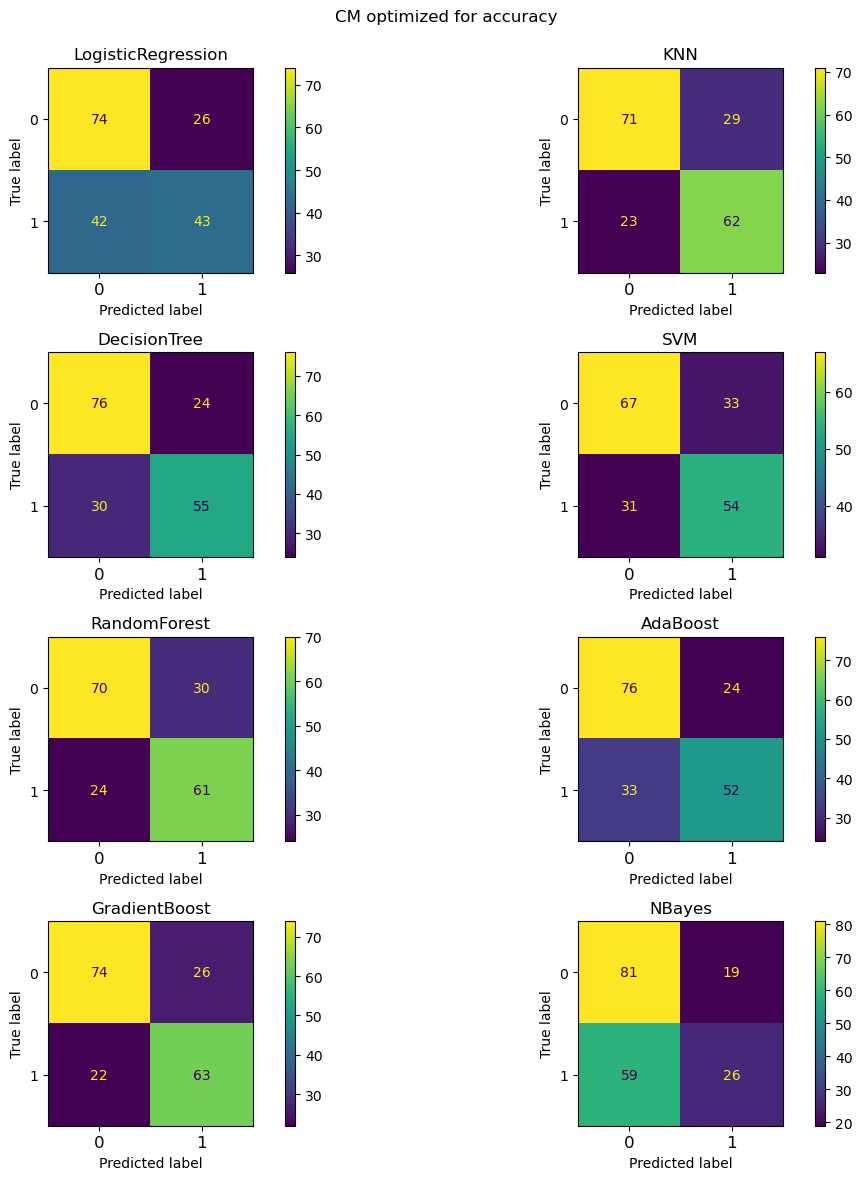

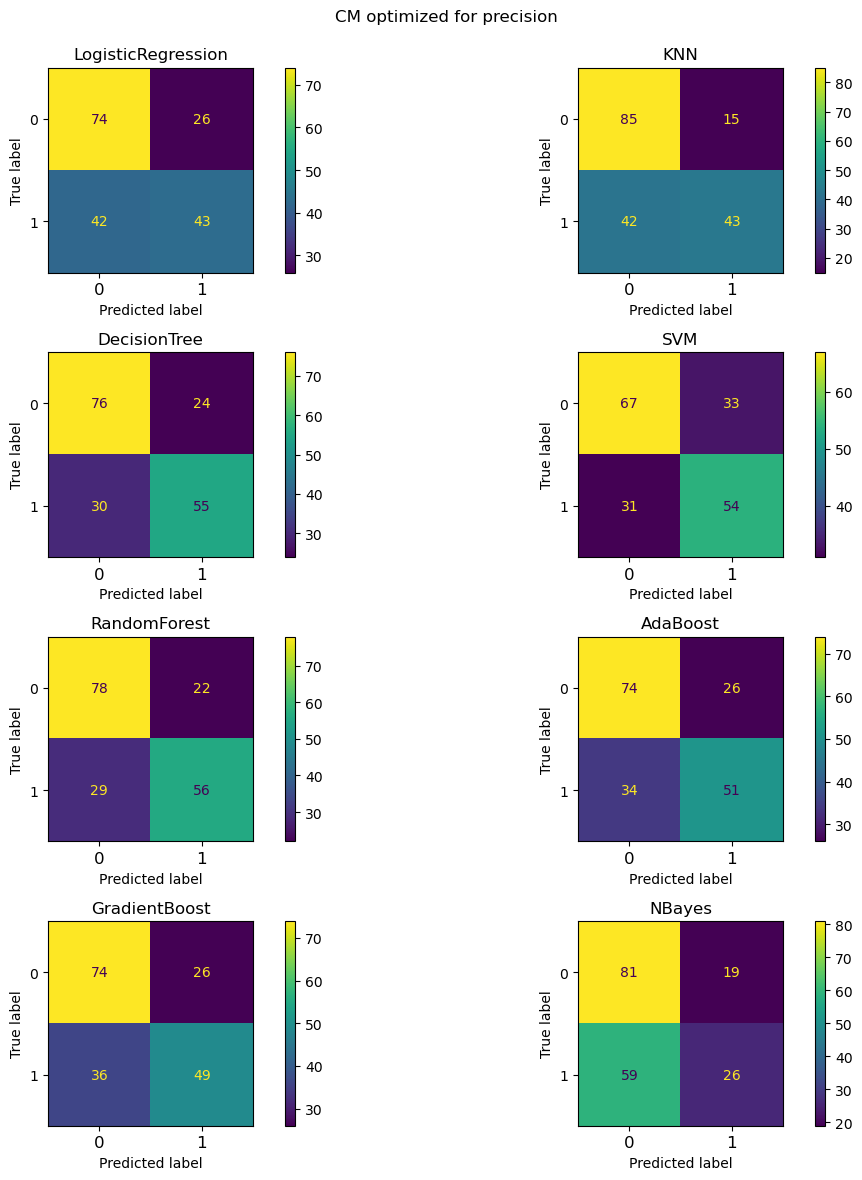

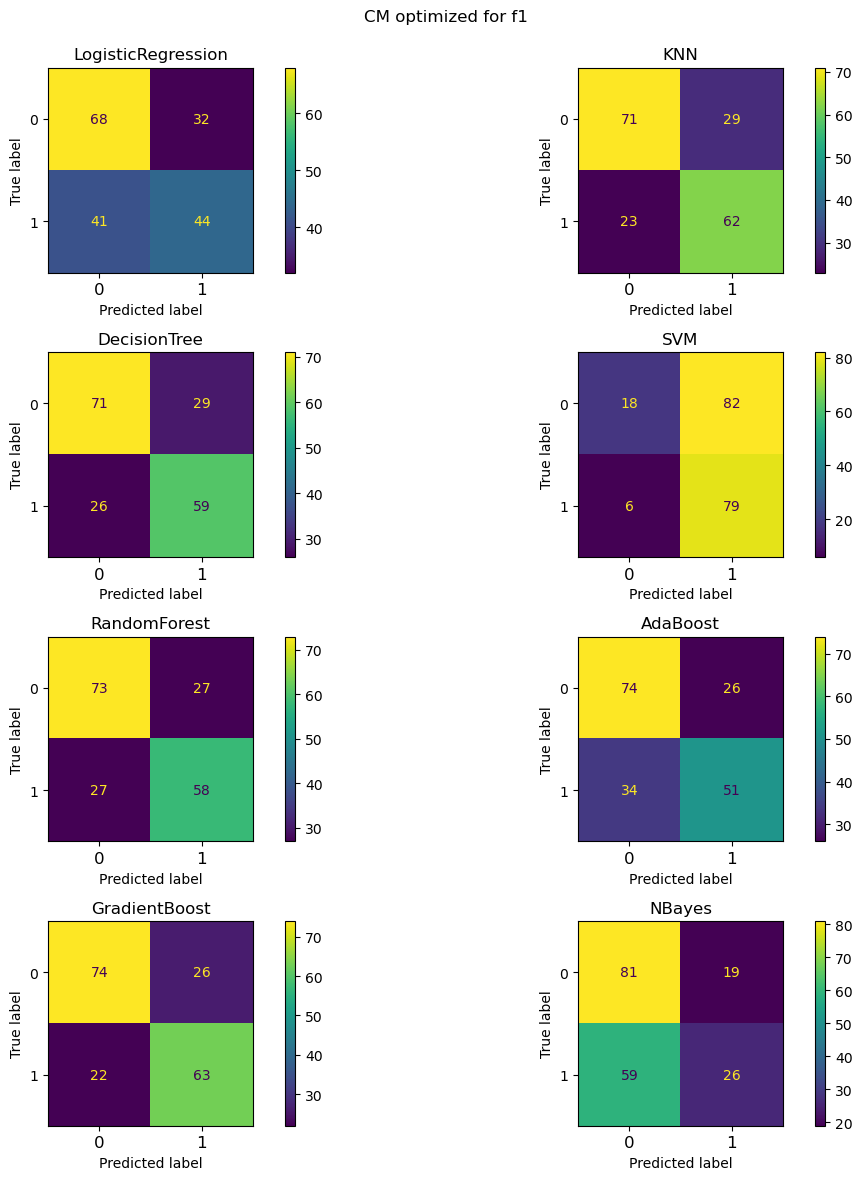

In [89]:
### Import modeling and visualization Libraries
import numpy as np
import pandas as pd
pd.set_option('display.width', None)        
pd.set_option('display.max_colwidth', 120)  #Set maximum column width
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore") 


### Define classification models and parameter grids for searches
# Define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter = 10000),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoost': GradientBoostingClassifier(),
    'NBayes': GaussianNB()
}

# Define parameter grids
param_grids = {
    'LogisticRegression': {'C': np.logspace(-2, 5, 30), 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] },
    'KNN': {'n_neighbors': [2, 5, 7, 10, 20], 'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
    'DecisionTree': {'max_depth': [2, 5, 10, 15, 20, 30, 50], 'criterion':['gini', 'entropy', 'log_loss'], 'min_samples_split': [2, 3, 5]},
    'SVM': {'C': [0.01, 0.1, 1, 10, 10.05], 'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
    'RandomForest': {'n_estimators': [10, 50, 100, 200], 'max_depth': [None]},
    'AdaBoost': {'n_estimators': [10, 50, 100, 200]},
    'GradientBoost': {'n_estimators': [10, 50, 100, 200]},
    'NBayes': {'var_smoothing': [1e-9]}
}

### Train and validate classifiers using BayesSearchCV
scoring_metrics = ['accuracy', 'precision', 'f1'] 
hyper_param_search_method = 'BayesSearchCV'
bayes_search_results_df_dict = {}


for scoring_metric in scoring_metrics:
    fig, axes = plt.subplots(4, 2, figsize=(12, 12))
    axes = axes.ravel()
    fig.suptitle('CM optimized for ' + scoring_metric + '\n', x = 0.6)
    results = []
    
    for idx, (name, classifier) in enumerate(classifiers.items()):
        match hyper_param_search_method:
            case "GridSearchCV":
                grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[name], scoring=scoring_metric, cv=5)
                
            case "BayesSearchCV":
                grid_search = BayesSearchCV(estimator=classifier, search_spaces=param_grids[name], n_iter=100, scoring=scoring_metric, cv=5)
                
            case "RandomizedSearchCV":
                grid_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_grids[name], scoring=scoring_metric, cv=5)
                
            case _:
                print("Unknown hyperparam search method")
        
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params =  grid_search.best_params_
        y_pred = best_model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[idx])
        axes[idx].set_title(name)
        results.append({
            'Classifier': name,
            'Test Accuracy': accuracy,
            'Test Recall': recall,
            'Test Precision': precision,
            'Test F1 Score': f1,
            'Best Params': best_params
            })
    
    
    plt.tight_layout()
    #plt.show()
    bayes_search_results_df = pd.DataFrame(results)
    bayes_search_results_df.set_index('Classifier', inplace = True)
    bayes_search_results_df_dict[scoring_metric] = bayes_search_results_df

In [90]:
# Display dictionary with results dataframes optimized for accuracy, precision and f1-score metrics
bayes_search_results_df_dict

{'accuracy':                     Test Accuracy  Test Recall  Test Precision  Test F1 Score  \
 Classifier                                                                      
 LogisticRegression       0.632432     0.505882        0.623188       0.558442   
 KNN                      0.718919     0.729412        0.681319       0.704545   
 DecisionTree             0.708108     0.647059        0.696203       0.670732   
 SVM                      0.654054     0.635294        0.620690       0.627907   
 RandomForest             0.708108     0.717647        0.670330       0.693182   
 AdaBoost                 0.691892     0.611765        0.684211       0.645963   
 GradientBoost            0.740541     0.741176        0.707865       0.724138   
 NBayes                   0.578378     0.305882        0.577778       0.400000   
 
                                                                           Best Params  
 Classifier                                                                  

In [91]:
# Display results dataframe optimized for accuracy
bayes_search_results_df_dict['accuracy'].drop(columns=['Best Params'])



,Test Accuracy,Test Recall,Test Precision,Test F1 Score
Classifier,,,,
LogisticRegression,0.632432,0.505882,0.623188,0.558442
KNN,0.718919,0.729412,0.681319,0.704545
DecisionTree,0.708108,0.647059,0.696203,0.670732
SVM,0.654054,0.635294,0.620690,0.627907
RandomForest,0.708108,0.717647,0.670330,0.693182
AdaBoost,0.691892,0.611765,0.684211,0.645963
GradientBoost,0.740541,0.741176,0.707865,0.724138
NBayes,0.578378,0.305882,0.577778,0.400000


In [92]:
# Display best parameters found by RandomizedSearch to optimize classification accuracy
bayes_search_results_df_dict['accuracy'][['Best Params']]

,Best Params
Classifier,
LogisticRegression,"{'C': 23.95026619987486, 'penalty': 'l2', 'solver': 'lbfgs'}"
KNN,"{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}"
DecisionTree,"{'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 3}"
SVM,"{'C': 10.05, 'kernel': 'poly'}"
RandomForest,"{'max_depth': None, 'n_estimators': 50}"
AdaBoost,{'n_estimators': 50}
GradientBoost,{'n_estimators': 200}
NBayes,{'var_smoothing': 1e-09}


In [93]:
# Display results dataframe optimized for precision
bayes_search_results_df_dict['precision'].drop(columns=['Best Params'])



,Test Accuracy,Test Recall,Test Precision,Test F1 Score
Classifier,,,,
LogisticRegression,0.632432,0.505882,0.623188,0.558442
KNN,0.691892,0.505882,0.741379,0.601399
DecisionTree,0.708108,0.647059,0.696203,0.670732
SVM,0.654054,0.635294,0.620690,0.627907
RandomForest,0.724324,0.658824,0.717949,0.687117
AdaBoost,0.675676,0.600000,0.662338,0.629630
GradientBoost,0.664865,0.576471,0.653333,0.612500
NBayes,0.578378,0.305882,0.577778,0.400000


In [94]:
# Display best parameters found by RandomizedSearch to optimize classification precision
bayes_search_results_df_dict['precision'][['Best Params']]

,Best Params
Classifier,
LogisticRegression,"{'C': 41.753189365604044, 'penalty': 'l2', 'solver': 'newton-cg'}"
KNN,"{'n_neighbors': 2, 'p': 3, 'weights': 'uniform'}"
DecisionTree,"{'criterion': 'log_loss', 'max_depth': 50, 'min_samples_split': 3}"
SVM,"{'C': 10.05, 'kernel': 'poly'}"
RandomForest,"{'max_depth': None, 'n_estimators': 10}"
AdaBoost,{'n_estimators': 100}
GradientBoost,{'n_estimators': 50}
NBayes,{'var_smoothing': 1e-09}


In [95]:
# Display results dataframe optimized for f1-score
bayes_search_results_df_dict['f1'].drop(columns=['Best Params'])



,Test Accuracy,Test Recall,Test Precision,Test F1 Score
Classifier,,,,
LogisticRegression,0.605405,0.517647,0.578947,0.546584
KNN,0.718919,0.729412,0.681319,0.704545
DecisionTree,0.702703,0.694118,0.670455,0.682081
SVM,0.524324,0.929412,0.490683,0.642276
RandomForest,0.708108,0.682353,0.682353,0.682353
AdaBoost,0.675676,0.600000,0.662338,0.629630
GradientBoost,0.740541,0.741176,0.707865,0.724138
NBayes,0.578378,0.305882,0.577778,0.400000


In [96]:
# Display best parameters found by RandomizedSearch to optimize classification f1-score
bayes_search_results_df_dict['f1'][['Best Params']]

,Best Params
Classifier,
LogisticRegression,"{'C': 0.16102620275609392, 'penalty': 'l2', 'solver': 'newton-cholesky'}"
KNN,"{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}"
DecisionTree,"{'criterion': 'log_loss', 'max_depth': 50, 'min_samples_split': 2}"
SVM,"{'C': 0.01, 'kernel': 'poly'}"
RandomForest,"{'max_depth': None, 'n_estimators': 200}"
AdaBoost,{'n_estimators': 100}
GradientBoost,{'n_estimators': 200}
NBayes,{'var_smoothing': 1e-09}


##### More feature engineering and exploration: Recursive feature elimination

In [97]:
# RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Initialize Gradient Boost classifier
gbc = GradientBoostingClassifier(n_estimators=200)

# Create RFECV selector
#rfecv_sel = RFECV(estimator=gbc, step=1, min_features_to_select=10, cv=StratifiedKFold(5), scoring="accuracy")
#rfecv_sel = RFECV(estimator=gbc, step=1, cv=StratifiedKFold(5), scoring="accuracy")
rfecv_sel = RFECV(estimator=gbc, step=1, cv=5, scoring="accuracy")

# Fit the RFECV model
rfecv_sel.fit(X_train, y_train)

# Extract names of selected features
rfecv_sel_feature_names = rfecv_sel.get_feature_names_out()

# Extract number of selected features
rfecv_sel_n_features = rfecv_sel.n_features_

print("Optimal number of features:", rfecv_sel_n_features)
print("Selected features:", rfecv_sel_feature_names)

Optimal number of features: 6
Selected features: ['Transportation expense' 'Distance from Residence to Work' 'Service time'
 'Age' 'Work load Average/day ' 'Body mass index']


In [103]:
X_resampled[rfecv_sel_feature_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Transportation expense           922 non-null    float64
 1   Distance from Residence to Work  922 non-null    float64
 2   Service time                     922 non-null    float64
 3   Age                              922 non-null    float64
 4   Work load Average/day            922 non-null    float64
 5   Body mass index                  922 non-null    float64
dtypes: float64(6)
memory usage: 43.3 KB


##### Redo analysis using the 6 most important features suggested by the RFE analysis above

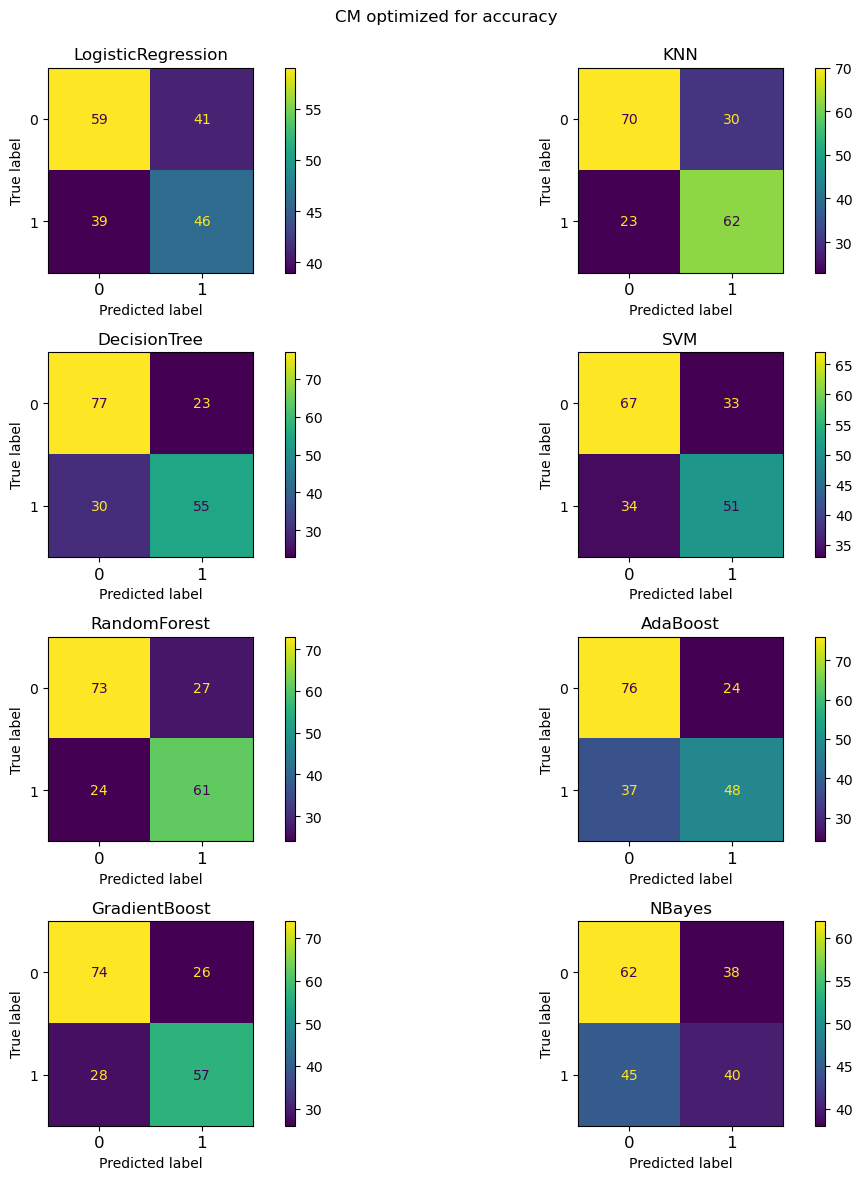

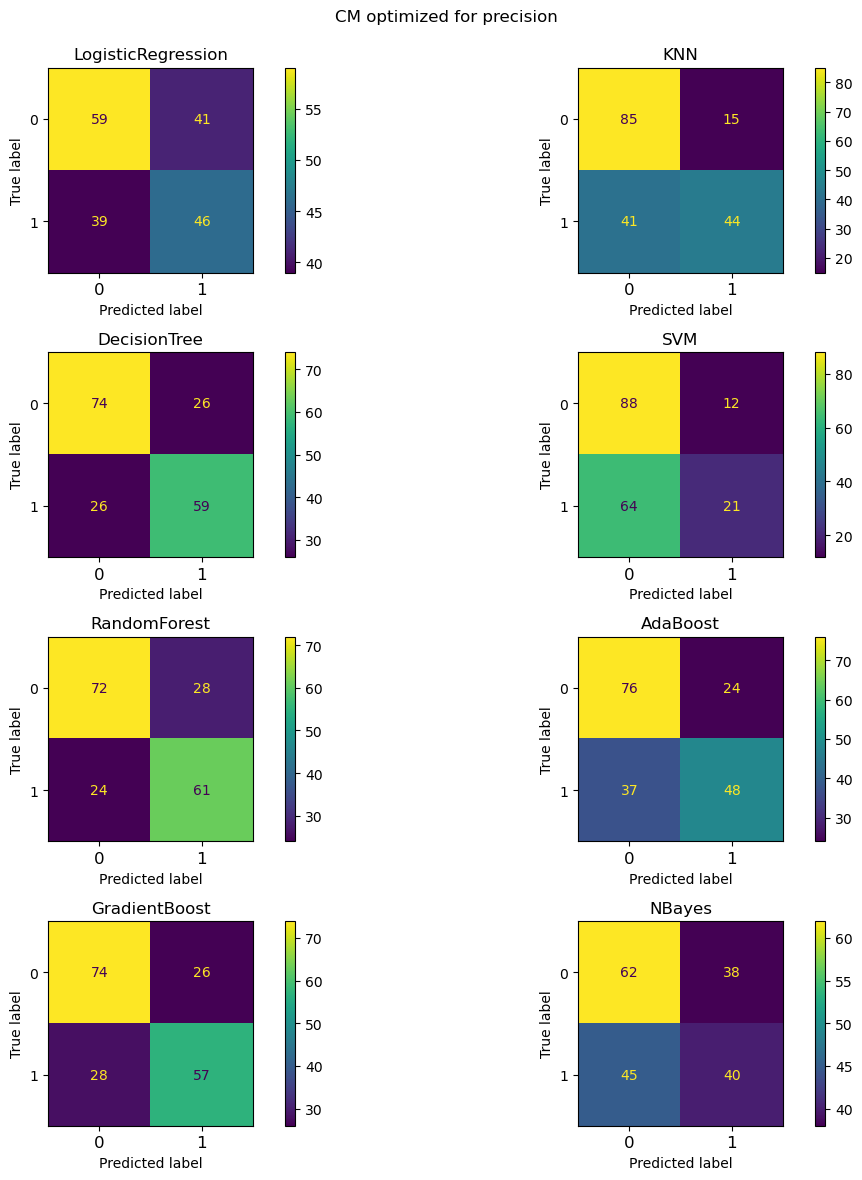

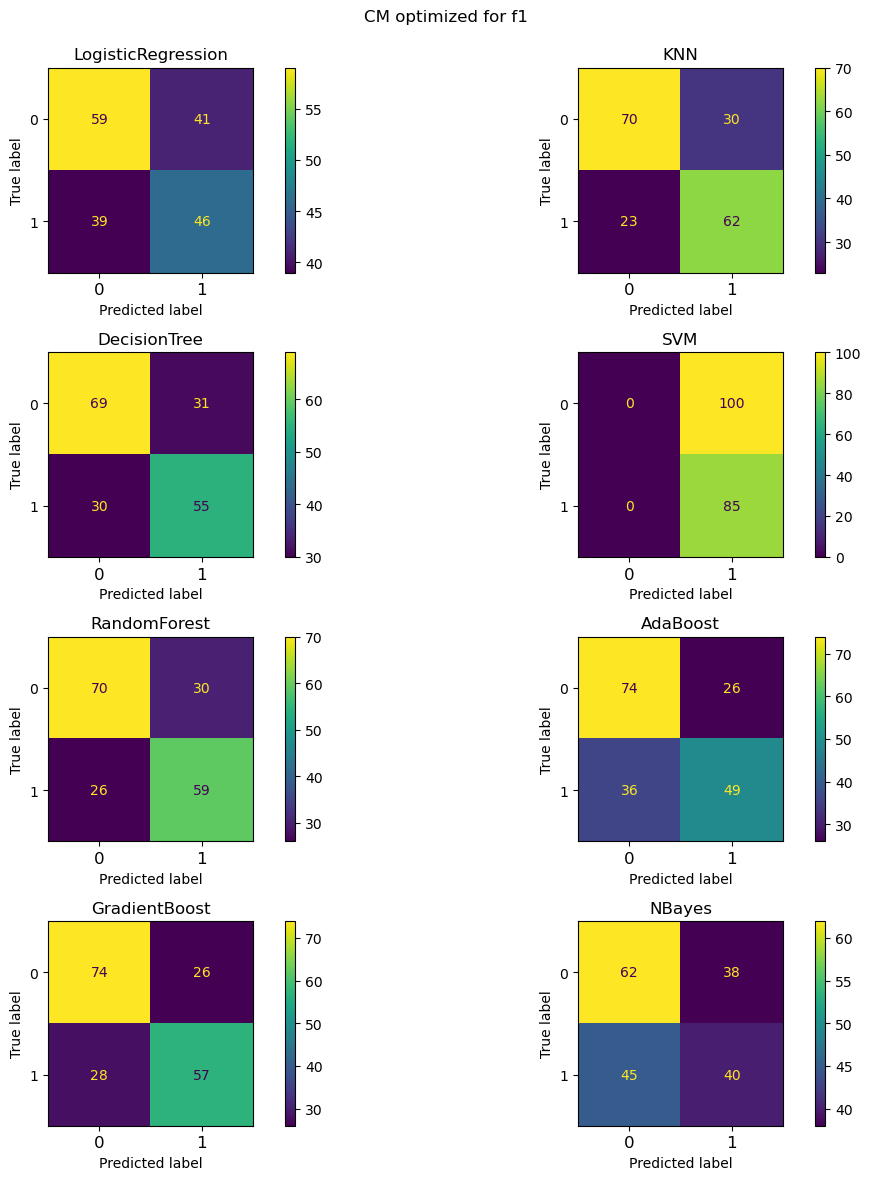

In [99]:
### Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from skopt import BayesSearchCV
import warnings
warnings.filterwarnings("ignore") 

# Use features suggested by RFECV
X_rfecv = X_resampled[rfecv_sel_feature_names]

# Generate a 80/20 train/test split
X_train_rfecv, X_test_rfecv, y_train_rfecv, y_test_rfecv = train_test_split(X_rfecv, y_resampled, test_size=0.2, random_state=42)

### Define Classifiers and Parameter Grids
# Define classifiers
base_estimator = DecisionTreeClassifier(max_depth=1)
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter = 10000),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoost': GradientBoostingClassifier(),
    'NBayes': GaussianNB()
}

# Define parameter grids
param_grids = {
    'LogisticRegression': {'C': np.logspace(-2, 5, 30), 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] },
    'KNN': {'n_neighbors': [2, 5, 7, 10, 20], 'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
    'DecisionTree': {'max_depth': [2, 5, 10, 15, 20, 30, 50], 'criterion':['gini', 'entropy', 'log_loss'], 'min_samples_split': [2, 3, 5]},
    'SVM': {'C': [0.01, 0.1, 1, 10, 10.05], 'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
    'RandomForest': {'n_estimators': [10, 50, 100, 200], 'max_depth': [None]},
    'AdaBoost': {'n_estimators': [10, 50, 100, 200]},
    'GradientBoost': {'n_estimators': [10, 50, 100, 200]},
    'NBayes': {'var_smoothing': [1e-9]}
}

### Train and Evaluate Classifiers
scoring_metrics = ['accuracy', 'precision', 'f1'] 
hyper_param_search_method = 'GridSearchCV'
results_df_dict = {}


for scoring_metric in scoring_metrics:
    fig, axes = plt.subplots(4, 2, figsize=(12, 12))
    axes = axes.ravel()
    fig.suptitle('CM optimized for ' + scoring_metric + '\n', x = 0.6)
    results = []
    
    for idx, (name, classifier) in enumerate(classifiers.items()):
        match hyper_param_search_method:
            case "GridSearchCV":
                grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[name], scoring=scoring_metric, cv=5)
                
            case "BayesSearchCV":
                grid_search = BayesSearchCV(estimator=classifier, search_spaces=param_grids[name], n_iter=100, scoring=scoring_metric, cv=5)
                
            case "RandomizedSearchCV":
                grid_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_grids[name], scoring=scoring_metric, cv=5)
                
            case _:
                print("Unknown hyperparam search method")
        
        
        grid_search.fit(X_train_rfecv, y_train_rfecv)
        best_model = grid_search.best_estimator_
        best_params =  grid_search.best_params_
        y_pred_rfecv = best_model.predict(X_test_rfecv)
        
        accuracy = accuracy_score(y_test_rfecv, y_pred_rfecv)
        recall = recall_score(y_test_rfecv, y_pred_rfecv)
        precision = precision_score(y_test_rfecv, y_pred_rfecv)
        f1 = f1_score(y_test_rfecv, y_pred_rfecv)
        
        cm = confusion_matrix(y_test_rfecv, y_pred_rfecv)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[idx])
        axes[idx].set_title(name)
        results.append({
            'Classifier': name,
            'Test Accuracy': accuracy,
            'Test Recall': recall,
            'Test Precision': precision,
            'Test F1 Score': f1,
            'Best Params': best_params
            })
    
    
    plt.tight_layout()
    #plt.show()
    new_results_df = pd.DataFrame(results)
    new_results_df.set_index('Classifier', inplace = True)
    results_df_dict[scoring_metric] = new_results_df



In [100]:
# Display results dataframe optimized for accuracy
results_df_dict['accuracy'].drop(columns=['Best Params'])

,Test Accuracy,Test Recall,Test Precision,Test F1 Score
Classifier,,,,
LogisticRegression,0.567568,0.541176,0.528736,0.534884
KNN,0.713514,0.729412,0.673913,0.700565
DecisionTree,0.713514,0.647059,0.705128,0.674847
SVM,0.637838,0.600000,0.607143,0.603550
RandomForest,0.724324,0.717647,0.693182,0.705202
AdaBoost,0.670270,0.564706,0.666667,0.611465
GradientBoost,0.708108,0.670588,0.686747,0.678571
NBayes,0.551351,0.470588,0.512821,0.490798


In [104]:
# Display results dataframe optimized for precision
results_df_dict['precision'].drop(columns=['Best Params'])

,Test Accuracy,Test Recall,Test Precision,Test F1 Score
Classifier,,,,
LogisticRegression,0.567568,0.541176,0.528736,0.534884
KNN,0.697297,0.517647,0.745763,0.611111
DecisionTree,0.718919,0.694118,0.694118,0.694118
SVM,0.589189,0.247059,0.636364,0.355932
RandomForest,0.718919,0.717647,0.685393,0.701149
AdaBoost,0.670270,0.564706,0.666667,0.611465
GradientBoost,0.708108,0.670588,0.686747,0.678571
NBayes,0.551351,0.470588,0.512821,0.490798


In [141]:
# Display results dataframe optimized for F1 scores
results_df_dict['f1'].drop(columns=['Best Params'])

,Test Accuracy,Test Recall,Test Precision,Test F1 Score
Classifier,,,,
LogisticRegression,0.567568,0.541176,0.528736,0.534884
KNN,0.713514,0.729412,0.673913,0.700565
DecisionTree,0.670270,0.647059,0.639535,0.643275
SVM,0.459459,1.000000,0.459459,0.629630
RandomForest,0.697297,0.694118,0.662921,0.678161
AdaBoost,0.664865,0.576471,0.653333,0.612500
GradientBoost,0.708108,0.670588,0.686747,0.678571
NBayes,0.551351,0.470588,0.512821,0.490798


Overall performance using the most important features selected by RFE is slightly below the performance of the models that employed the full feature set

#### Conclusions
We have followed the main tenants of the CRISP-DM methodology to explore the application of ML techniques to HR management. In particular we studied absenteeism using a publicly available information database created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil ([link](https://archive.ics.uci.edu/dataset/445/absenteeism+at+work)). 

We performed an exploratory data analysis of absenteeism and how it was connected to several key factors (features) in the database. A summary of main findings is given below:
* The total number of absenteeism hours was 5124.
  
* The average absence time was 7.4 hr. The STD was 13.6 hr.
  
* Half of the absent workers were away for 3 hr or less
  
* The maximum absence time was 120 hr (15 days)
  
* The average Service time of absentees was 12.6 years with minimum of 1 and a maximum of 29 years. 75% of absentees had less than 16 years of service.
  
* The mean Age of absentees was 36.3 years with a minimum of 27 years and a maximum of 58 years. 75% of absentees were younger than 40 yo
  
* The average distance from their residence location to work for absentees was 29.9 Km
    
* There were 44 individuals with perfect attendance record (6% of total)
  
* By extension, 94% of individuals reported absences during the year 

* The main reasons for absences were medical consultation (21.4%), dental consultation (16.1%), physiotherapy(9.8%), diseases of the musculoskeletal system and connective tissue (7.9%), injuries (5.7%) and patient follow-up(5.5%)

* The majority of absent hours were caused by diseases of the musculoskeletal system and connective tissue (842 hr); injury, poisoning and certain other consequences of external causes (729 hr); as well as medical(424 hr) and dental(335 hr) consultations. There were significant absences due to diseases of the respiratory(276 hr) and digestive(297 hr) systems.

* The months with the most absenteeism cases were March (12%), February (10.3%) and July (9.3%)
  
* The months with the most absenteeism time were March (765 hr), July (734 hr), April (482 hr) and November (473 hr)
  
* The days with the most absence cases were Monday (22.1%), Wednesday (20.8%), Tuesday (20.3%) and Friday (19.8%)
  
* The days with the most absenteeism hours were Monday (1489 hr), Tuesday (1229 hr), Wednesday (1115 hr) and Friday (738 hr)
  
* Absence cases were almost equally distributed across seasons with Autumn having a slight uptick (27.2%)
  
* The season with the most absenteeism hours was Autumn (1492 hr), followed by Spring (1241) and Winter (1239) which differed very little.

* None of the absentees were subject to disciplinary action prior to being absent
  
* The majority of the absentees (82%) had high school education

* Employees with this level of education had the most absenteeism hours (4393 hr)

* A large majority of absentees (58.5%) had children

* The largest number of absenteeism hours were seen in employees with 2 children (1649 hr)
  
* 56.2 percent of absentees were social drinkers. The largest number of absenteeism hours were in the social drinker group (3226 hr)
  
* 6.6 percent of absentees were social smokers. The largest number of absenteeism hours were in the non-smoker group (4773 hr)
  
* 37.8% of absenteeism cases were found in employees who owned pets. The total number of absenteeism hours for pet owners was 1983 hr. The largest number of hours belonged to the no-pet ownership group (3141 hr)
  
* 32.2% of absenteeism cases were found in employees with obesity. The total number of absenteeism hours for these employees was 1461 hr
  
* 31.9% of absenteeism cases were found in employees who were overweight. The total number of absenteeism hours for these employees was 1931 hr.
  
* 40.4% of absenteeism cases were found in employees who were younger than 35 years old. 38.8% of cases were found in the 35 to 40 years old bracket
  
* The largest number of absent hours (1777 hr) were found in the 33-40 year old bracket
  
* 43.7% of absenteeism cases were found in employees with a 240 to 250 Workload average a day
  
* 61.5% of absentees had a transportation expense between 175 and 280
  
* 67.7% of absentees live 25 Km or farther from work. The largest group of absentees (27.9%) live 50+ Km from work
  
* 88.9% of absences were in employees with 9 to 18 years of service
  
* The largest number of absence hours (3182 hr) were found in the group with 9-14 years of service
  
Following this statistical analysis we proceeded to model absenteeism in an attempt to develop a tool for predicting employee absences. For this purpose we framed the modeling as a binary classification problem that captured the influence of significant absenteeism events, considered as such when the employee absence time was > 4 Hr.  We employed a variety of known classification methods (KNN, Decision Tree, Logistic Regression, SVM, Random Forest, Naive Bayes, etc) and compared their predictive performance on test data sets. The performance metrics used were accuracy, precision, recall and F1 scores. Hyperparameter searches on the different estimators were carried out using different methods (GridSearch, RadomizedSearch, BayesianSearch) in an attempt to optimize performance for accuracy, precision and F1 scores. The best performing models were GradientBoost, Random Forest and KNN (details in the analysis notebook attached)
